In [ ]:
!pip uninstall -y pyarrow -q
!rm -rf /usr/local/lib/python3.12/dist-packages/pyarrow*

# Core libraries (transformers, embeddings, FAISS, etc.)
!pip install -U \
    transformers \
    accelerate \
    bitsandbytes \
    sentence-transformers \
    faiss-cpu \
    datasets

# NLP / text utilities
!pip install textstat beautifulsoup4 lxml gTTS

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.3/506.3 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 14.1 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.0
    Uninstalling transformers-4.57.0:
      Successfully uninstalled transformers-4.57.0
  Attempting uninstall: datasets
    Found existing installation: datasets 4.0.0
    Uninstalling datasets-4.0.0:
      Successfully uninstalled datasets-4.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12

In [ ]:
!pip install pillow timm torch torchvision easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 15.1 MB/s eta 0:00:00


In [ ]:
# Core native deps for ocrmypdf
!apt-get -q update
!apt-get -q install -y ocrmypdf tesseract-ocr qpdf ghostscript pngquant poppler-utils
# Python libs we use elsewhere
!pip -q install pymupdf pdf2image easyocr pillow tqdm
!pip install -q pytesseract # Install pytesseract

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 https://cli.github.com/packages stable/main amd64 Packages [344 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,368 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:14 http:/

In [ ]:
import re, requests
from bs4 import BeautifulSoup
from typing import List, Dict

# Installations

In [ ]:


import torch, platform, os, gc
print("Torch:", torch.__version__, "| CUDA available:", torch.cuda.is_available())

Torch: 2.8.0+cu126 | CUDA available: True


In [ ]:
import re, json, time, requests
from typing import List, Dict
from bs4 import BeautifulSoup
import numpy as np

def clean_text(s: str) -> str:
    s = re.sub(r'\s+', ' ', s).strip()
    # collapse long lines a bit for readability
    return s

## Config: patient profile & project toggles

In [ ]:
# Patient test profiles

patient_profiles = [
    # English, low literacy
    {"age": 65, "literacy": "low", "language": "English", "drug": "metoprolol"},
    {"age": 55, "literacy": "low", "language": "English", "drug": "lisinopril"},

    # English, high literacy
    {"age": 45, "literacy": "high", "language": "English", "drug": "amoxicillin"},

    # Spanish, low literacy
    {"age": 70, "literacy": "low", "language": "Spanish", "drug": "metoprolol"},
    {"age": 60, "literacy": "low", "language": "Spanish", "drug": "amoxicillin"},

    # Spanish, moderate literacy
    {"age": 50, "literacy": "moderate", "language": "Spanish", "drug": "lisinopril"},

    # English, very low literacy
    {"age": 80, "literacy": "very low", "language": "English", "drug": "metformin"},

    # Spanish, bilingual edge case
    {"age": 68, "literacy": "low", "language": "Spanish-English", "drug": "atorvastatin"},
]

In [ ]:
# Retrieval settings (global)
TOP_K = 8
MIN_CHUNK_LEN = 200  # characters

## Open data loaders (MedlinePlus + openFDA)

In [ ]:

# Fetch + Combine MedlinePlus and openFDA for ALL drugs


def fetch_medlineplus_drug(drug: str) -> Dict | None:
    """
    Fetches consumer-facing drug guidance from MedlinePlus based on drug name.
    Falls back to generic URLs if specific path not known.
    """
    drug_paths = {
        "metoprolol": "druginfo/meds/a682864.html",
        "lisinopril": "druginfo/meds/a692051.html",
        "amoxicillin": "druginfo/meds/a685001.html",
    }

    topic_or_url = drug_paths.get(drug.lower())
    if not topic_or_url:
        print(f"⚠️ No MedlinePlus path known for {drug.title()} — skipping MedlinePlus fetch.")
        return None

    url = topic_or_url if topic_or_url.startswith("http") else f"https://medlineplus.gov/{topic_or_url}"

    try:
        r = requests.get(url, timeout=30)
        r.raise_for_status()
        soup = BeautifulSoup(r.text, "lxml")
        paras = [p.get_text(" ", strip=True) for p in soup.select("div.section > p")]
        text = "\n".join(paras)
        return {"source": "MedlinePlus", "drug": drug, "url": url, "text": clean_text(text)}

    except Exception as e:
        print(f" Failed to fetch MedlinePlus data for {drug.title()}: {e}")
        return None


def fetch_openfda_label(drug: str) -> Dict | None:
    """
    Pulls FDA drug label JSON (DailyMed SPL) via openFDA.
    Returns a subset of sections useful for patient instructions.
    """
    api = "https://api.fda.gov/drug/label.json"
    q = f'openfda.brand_name:"{drug}" + openfda.generic_name:"{drug}"'
    try:
        r = requests.get(api, params={"search": q, "limit": 1}, timeout=30)
        j = r.json()
        if "results" not in j or not j["results"]:
            print(f"⚠️ openFDA label not found for {drug.title()}")
            return None
        doc = j["results"][0]
    except Exception as e:
        print(f" openFDA fetch failed for {drug.title()}: {e}")
        return None

    keep = [
        "indications_and_usage",
        "dosage_and_administration",
        "warnings",
        "patient_medication_information",
        "information_for_patients",
        "contraindications",
        "adverse_reactions"
    ]

    chunks = []
    for k in keep:
        if k in doc:
            v = doc[k]
            if isinstance(v, list):
                v = " ".join(v)
            chunks.append(f"## {k.replace('_', ' ').title()}\n{v}")

    text = "\n\n".join(chunks)
    return {"source": "openFDA", "drug": drug, "id": doc.get("id", ""), "text": clean_text(text)}


unique_drugs = sorted(set([p["drug"].lower() for p in patient_profiles]))
print(f"Fetching content for {len(unique_drugs)} drugs: {unique_drugs}")

corpora = []

for drug in unique_drugs:
    print(f"\n🔍 Loading data for {drug.title()} ...")
    medline = fetch_medlineplus_drug(drug)
    openfda = fetch_openfda_label(drug)

    # merge only valid text sources
    sources = [c for c in [medline, openfda] if c and c.get("text")]
    corpora.extend(sources)

    print(" Loaded sources:", [c["source"] for c in sources],
          "| Total chars:", sum(len(c["text"]) for c in sources))
    if not openfda:
        print(f" Note: openFDA entry not found for {drug.title()} — using MedlinePlus only.")

print(f"\n Final combined corpus: {len(corpora)} documents from {len(unique_drugs)} drugs.")

Fetching content for 5 drugs: ['amoxicillin', 'atorvastatin', 'lisinopril', 'metformin', 'metoprolol']

🔍 Loading data for Amoxicillin ...
 Loaded sources: ['openFDA'] | Total chars: 14352

🔍 Loading data for Atorvastatin ...
⚠️ No MedlinePlus path known for Atorvastatin — skipping MedlinePlus fetch.
 Loaded sources: ['openFDA'] | Total chars: 15764

🔍 Loading data for Lisinopril ...
 Loaded sources: ['openFDA'] | Total chars: 29466

🔍 Loading data for Metformin ...
⚠️ No MedlinePlus path known for Metformin — skipping MedlinePlus fetch.
 Loaded sources: ['openFDA'] | Total chars: 21311

🔍 Loading data for Metoprolol ...
 Loaded sources: ['openFDA'] | Total chars: 11976

 Final combined corpus: 5 documents from 5 drugs.


In [ ]:
import pandas as pd
import re

def chunk_with_meta(corpus, min_len=MIN_CHUNK_LEN):
    """
    Splits each document in the corpus into manageable chunks,
    preserving metadata (source, section, and drug).
    Suitable for multi-drug RAG pipelines.
    """
    rows = []
    for c in corpus:
        src = c.get("source", "Unknown")
        text = c.get("text", "").strip()
        drug = c.get("drug", "Unknown").lower()

        if not text:
            continue  # skip empty docs

        # Split paragraphs on blank lines
        parts = re.split(r"\n{2,}", text)
        for p in parts:
            p = p.strip()
            if len(p) < min_len:
                continue

            # Try to extract heading-based section
            m = re.match(r"^##\s*([A-Za-z0-9 \-]+)\s*\n", p)
            section = m.group(1).strip() if m else (
                "General" if src == "MedlinePlus" else "Unlabeled"
            )

            rows.append({
                "drug": drug,
                "source": src,
                "section": section,
                "text": p[:2500],  # truncation safeguard
                "char_len": len(p),
                "word_len": len(p.split())
            })

    df = pd.DataFrame(rows)
    print(f" Created {len(df)} chunks from {df['drug'].nunique()} drugs, avg {df['char_len'].mean():.0f} chars per chunk.")
    return df

# Run chunking on the unified multi-drug corpus
chunk_df = chunk_with_meta(corpora)
chunk_df.head(5)

 Created 5 chunks from 5 drugs, avg 18574 chars per chunk.


,drug,source,section,text,char_len,word_len
0,amoxicillin,openFDA,Unlabeled,## Indications And Usage 1 INDICATIONS AND USA...,14352,2165
1,atorvastatin,openFDA,Unlabeled,## Indications And Usage 1 INDICATIONS AND USA...,15764,2321
2,lisinopril,openFDA,Unlabeled,## Indications And Usage INDICATIONS AND USAGE...,29466,3985
3,metformin,openFDA,Unlabeled,## Indications And Usage 1 INDICATIONS AND USA...,21311,3158
4,metoprolol,openFDA,Unlabeled,## Indications And Usage 1 INDICATIONS AND USA...,11976,1731


In [ ]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("BAAI/bge-small-en-v1.5")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

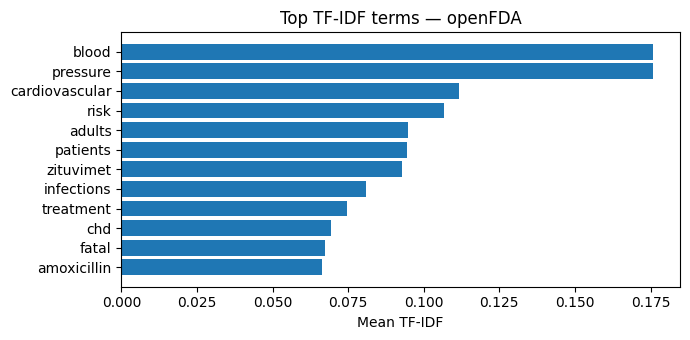

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt

def top_tfidf_terms(texts, k=12, stop_words="english"):
    vec = TfidfVectorizer(stop_words=stop_words, max_features=5000)
    M = vec.fit_transform(texts)
    means = np.asarray(M.mean(axis=0)).ravel()
    vocab = np.array(vec.get_feature_names_out())
    top_idx = means.argsort()[-k:][::-1]
    return list(zip(vocab[top_idx], means[top_idx]))

for src in chunk_df["source"].unique():
    src_texts = chunk_df.loc[chunk_df["source"]==src, "text"].tolist()
    tops = top_tfidf_terms(src_texts, k=12)
    terms, scores = zip(*tops)

    plt.figure(figsize=(7,3.5))
    y = np.arange(len(terms))[::-1]
    plt.barh(y, scores)
    plt.yticks(y, terms)
    plt.title(f"Top TF-IDF terms — {src}")
    plt.xlabel("Mean TF-IDF")
    plt.tight_layout()
    plt.show()

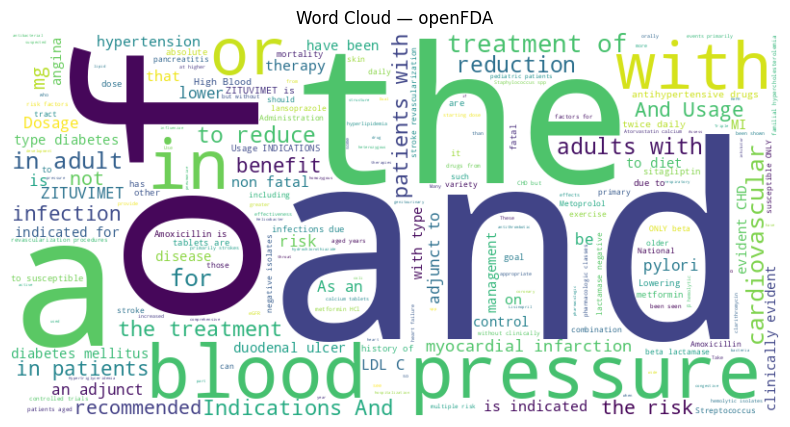

In [ ]:
!pip -q install wordcloud
from wordcloud import WordCloud

for src in chunk_df["source"].unique():
    text_all = " ".join(chunk_df.loc[chunk_df["source"]==src, "text"])
    wc = WordCloud(width=800, height=400, background_color="white",
                   stopwords="english", colormap="viridis").generate(text_all)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud — {src}")
    plt.show()

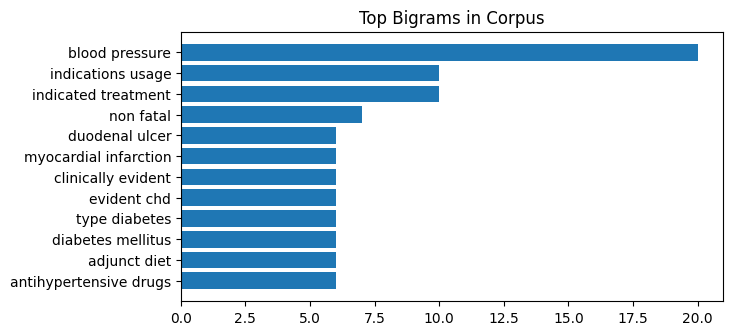

In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def get_top_ngrams(texts, n=2, k=10):
    tokens = []
    for t in texts:
        words = [w.lower() for w in re.findall(r"\b[a-zA-Z]{3,}\b", t) if w.lower() not in ENGLISH_STOP_WORDS]
        tokens.extend(zip(*[words[i:] for i in range(n)]))
    cnt = Counter(tokens)
    return cnt.most_common(k)

bigrams = get_top_ngrams(chunk_df["text"].tolist(), n=2, k=12)
labels = [" ".join(bg) for bg,_ in bigrams]
vals   = [c for _,c in bigrams]

plt.figure(figsize=(7,3.5))
plt.barh(np.arange(len(labels))[::-1], vals)
plt.yticks(np.arange(len(labels))[::-1], labels)
plt.title("Top Bigrams in Corpus")
plt.show()

## Embed & index with FAISS (BGE-small)

In [ ]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np
import re
from typing import List, Dict

EMB_MODEL = "BAAI/bge-small-en-v1.5"
embedder = SentenceTransformer(EMB_MODEL)

def build_chunks(corpus: List[Dict], min_len=MIN_CHUNK_LEN) -> List[Dict]:
    """
    Builds chunks from the corpus while keeping drug and source metadata.
    """
    chunks = []
    for c in corpus:
        text = c.get("text", "").strip()
        if not text:
            continue
        drug = c.get("drug", "unknown").lower()
        src = c.get("source", "unknown")

        for para in re.split(r"\n{2,}", text):
            para = para.strip()
            if len(para) < min_len:
                continue
            chunks.append({
                "drug": drug,
                "source": src,
                "text": para[:2500]  # limit for token safety
            })
    print(f"Created {len(chunks)} chunks across {len(set(c['drug'] for c in chunks))} drugs.")
    return chunks


def build_index(chunks: List[Dict]):
    """
    Encodes text chunks and builds a FAISS index for retrieval.
    """
    texts = [c["text"] for c in chunks]
    X = embedder.encode(
        texts,
        normalize_embeddings=True,
        convert_to_numpy=True,
        show_progress_bar=True
    )
    index = faiss.IndexFlatIP(X.shape[1])
    index.add(X)
    print(f"FAISS index built with {len(texts)} chunks, dim={X.shape[1]}")
    return index, X


def retrieve(index, chunks: List[Dict], query: str, drug: str = None, k: int = TOP_K) -> str:
    """
    Retrieves the top-k relevant chunks for a given query.
    Optionally filters results by drug name.
    """
    qv = embedder.encode([query], normalize_embeddings=True, convert_to_numpy=True)
    D, I = index.search(qv, min(k, len(chunks)))

    results = [chunks[i] for i in I[0]]
    if drug:
        filtered = [r for r in results if r["drug"] == drug.lower()]
        if filtered:
            results = filtered

    ctx = "\n\n".join(f"[{r['drug'].title()} - {r['source']}]\n{r['text']}" for r in results)
    return ctx


chunks = build_chunks(corpora)
index, _ = build_index(chunks)
print(f"FAISS index ready with {len(chunks)} total chunks.")

# Example retrieval
query = "What is this medicine used for and how should I take it?"
context = retrieve(index, chunks, query, drug="metoprolol", k=TOP_K)
print("\n--- Retrieved Context ---\n")
print(context[:1000])

Created 5 chunks across 5 drugs.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

FAISS index built with 5 chunks, dim=384
FAISS index ready with 5 total chunks.

--- Retrieved Context ---

[Metoprolol - openFDA]
## Indications And Usage 1 INDICATIONS AND USAGE Metoprolol tartrate tablets are a beta-adrenergic blocker indicated for the treatment of: Hypertension, to lower blood pressure. Lowering blood pressure reduces the risk of fatal and non-fatal cardiovascular events, primarily strokes and myocardial infarctions. ( 1.1 ) Angina Pectoris. ( 1.2 ) Myocardial Infarction, to reduce the risk of cardiovascular mortality when used in conjunction with intravenous metoprolol therapy in patients with definite or suspected acute myocardial infarction in hemodynamically stable patients. ( 1.3 ) 1.1 Hypertension Metoprolol tartrate tablets are indicated for the treatment of hypertension in adult patients, to lower blood pressure. Lowering blood pressure lowers the risk of fatal and non-fatal cardiovascular events, primarily strokes and myocardial infarctions. These benefits

## Load open-source LLM (Qwen-2.5 1.5B, 4-bit) + grounded generation

In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
import torch, json, re

def load_llm():
    model_id = "Qwen/Qwen2.5-1.5B-Instruct"
    quant_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_compute_dtype=torch.float16,
        bnb_4bit_use_double_quant=True,
        bnb_4bit_quant_type="nf4",
    )
    tok = AutoTokenizer.from_pretrained(model_id, use_fast=True)
    mdl = AutoModelForCausalLM.from_pretrained(
        model_id,
        device_map="auto",
        quantization_config=quant_config
    )
    return pipeline(
        "text-generation",
        model=mdl,
        tokenizer=tok,
        max_new_tokens=350,
        do_sample=False,
        temperature=0.0,
        top_p=0.9,
        top_k=30,
        repetition_penalty=1.2,
        eos_token_id=tok.eos_token_id,
        pad_token_id=tok.eos_token_id
    )

gen = load_llm()

SYSTEM = (
    "You are a clinical patient-education assistant. "
    "Generate concise discharge instructions using ONLY the facts in [CONTEXT].\n\n"
    "RULES:\n"
    "- Do not invent or guess.\n"
    "- Do not include any unrelated or extra content.\n"
    "- Do not repeat the word 'End' more than once.\n"
    "- Keep each section under 3 short bullet points.\n"
    "- Always follow the section template exactly.\n"
    "- End the output immediately after the 'Summary' section.\n\n"
    "FORMAT:\n"
    "### Discharge Instructions\n"
    "**When to Take:**\n- ...\n\n"
    "**What to Avoid:**\n- ...\n\n"
    "**Common Side Effects:**\n- ...\n\n"
    "**When to Call a Doctor:**\n- ...\n\n"
    "**Summary:**\n- ...\n\n"
    "End with this exact line:\n"
    "'This information is based only on provided medical sources.'"
)

def clean_output(text):
    """Clean repeated endings and unrelated drift."""
    text = text.split("Human resources department")[0]  # stop HR hallucinations
    text = re.sub(r"(?i)(end\.?\s*){2,}", "End.", text)
    text = re.sub(r"(?i)(thank you|have a|good day|safe travels).*", "", text)
    text = re.sub(r"\n{3,}", "\n\n", text)
    return text.strip()

def make_leaflet(patient, context):
    user = (
        f"Patient info:\n"
        f"- Age: {patient['age']}\n"
        f"- Literacy: {patient['literacy']}\n"
        f"- Language: {patient['language']}\n"
        f"- Drug: {patient['drug']}\n"
        "Generate the leaflet in the language specified. Be brief, factual, and follow the format exactly."
    )
    prompt = f"[SYSTEM]\n{SYSTEM}\n\n[CONTEXT]\n{context}\n\n[USER]\n{user}\n[ASSISTANT]"
    out = gen(prompt, max_new_tokens=350, truncation=True)[0]["generated_text"]
    leaflet = out.split("[ASSISTANT]")[-1].strip()
    return clean_output(leaflet)

def summarize_leaflet(text):
    """Short factual summary only (2 sentences max)."""
    summary_prompt = (
        "Summarize the leaflet below in 2 short factual sentences. "
        "Do not repeat phrases, and end with a period.\n\n"
        f"{text}\n\nSummary:"
    )
    out = gen(summary_prompt, max_new_tokens=80, do_sample=False)[0]["generated_text"]
    summary = out.split("Summary:")[-1].strip()
    summary = re.sub(r"(?i)(end\.?\s*){1,}", "", summary)
    return summary.split("\n")[0].strip()

# Run across patients
results = []
for i, PATIENT in enumerate(patient_profiles, start=1):
    print(f"\n{'='*70}")
    print(f"Case {i}: {PATIENT['drug']} | {PATIENT['language']} | Literacy: {PATIENT['literacy']}")

    query = f"{PATIENT['drug']} discharge instructions"
    context = retrieve(index, chunks, query, drug=PATIENT["drug"], k=TOP_K)
    leaflet = make_leaflet(PATIENT, context)
    summary = summarize_leaflet(leaflet)

    results.append({
        "patient": PATIENT,
        "leaflet": leaflet,
        "summary": summary
    })

    print("\n--- Leaflet ---\n", leaflet)
    print("\n--- Summary ---\n", summary)

with open("final_patient_leaflets_clean.json", "w") as f:
    json.dump(results, f, indent=2)
print("All leaflets saved as final_patient_leaflets_clean.json.")

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

Device set to use cuda:0
The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



Case 1: metoprolol | English | Literacy: low

--- Leaflet ---
 ### When To Use

Take your medication **when you need help lowering your blood pressure**, especially if you're taking care of yourself by following these steps:

• Follow up closely with healthcare professionals who know about your condition.

• Make sure everyone involved understands how important it is to take their medicine correctly every day.

• If someone else takes over caring for you, make sure they understand what's happening.

• Don't stop taking your pills without talking to them first!

### What You Should Not Do

Do not do anything dangerous while taking this pill because it may cause side effects like dizziness, nausea, headache, etc., which could lead to accidents.

### Common Side Effects

Some people might feel dizzy or lightheaded right away. This usually goes away quickly. Other common problems are stomach pain, feeling sick to your tummy, trouble sleeping, tiredness, muscle cramps, dry mouth, nosebleed

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset



--- Leaflet ---
 ### When to take:

Take **once daily**, preferably at bedtime.

### What to avoid:

Avoid taking **with food**; it may cause stomach upset if taken with meals.

### Common side effects:

* Nausea  
* Diarrhea  

If you experience severe symptoms such as difficulty breathing, swelling of your face, lips, tongue, or throat, stop taking the medication right away and call your doctor.

### Summary:

Always read labels carefully before use. If you have questions about how to take the medicine, ask your pharmacist or doctor. This information does not replace professional advice from healthcare providers. 

This information is based only on provided medical sources.

--- Summary ---
 Take once per day, ideally after dinner. Avoid eating while taking this pill because it might make your tummy hurt. Side effects like nausea are common but usually mild. Call for help if anything seems really wrong. Always check what's written on the bottle first! #MedHelp

Case 6: lisinopril | 

# Readability + Spanish + MP3

In [ ]:
import textstat
from transformers import MarianMTModel, MarianTokenizer
from gtts import gTTS
from IPython.display import HTML, display, Audio

def en_to_es(text):
    """Translate English text to Spanish using MarianMT."""
    model = "Helsinki-NLP/opus-mt-en-es"
    tok = MarianTokenizer.from_pretrained(model)
    mdl = MarianMTModel.from_pretrained(model)
    ins = tok(text, return_tensors="pt", truncation=True)
    out = mdl.generate(**ins, max_new_tokens=800)
    return tok.batch_decode(out, skip_special_tokens=True)[0]

# Compute readability and translation
leaflet_en = leaflet.strip()
fk_grade = textstat.flesch_kincaid_grade(leaflet_en)
leaflet_es = en_to_es(leaflet_en) if leaflet_en else "No English text available."
audio_filename = "leaflet_es.mp3"

# Save Spanish audio narration
if leaflet_es and leaflet_es.strip():
    gTTS(leaflet_es, lang="es").save(audio_filename)

# Build HTML card (light/dark adaptive)
html = f"""
<style>
  :root {{
    --bg-light: #f8fafc;
    --bg-dark: #0f172a;
    --text-light: #111827;
    --text-dark: #f9fafb;
    --card-light: #ffffff;
    --card-dark: #1e293b;
    --accent-blue: #3b82f6;
    --accent-green: #22c55e;
  }}
  @media (prefers-color-scheme: dark) {{
    body {{ background: var(--bg-dark); color: var(--text-dark); }}
    .card {{ background: var(--card-dark); border: 1px solid #334155; }}
  }}
  @media (prefers-color-scheme: light) {{
    body {{ background: var(--bg-light); color: var(--text-light); }}
    .card {{ background: var(--card-light); border: 1px solid #e2e8f0; }}
  }}
  .card {{
    border-radius: 12px;
    padding: 18px 22px;
    max-width: 900px;
    margin: 20px auto;
    font-family: 'Inter', sans-serif;
    box-shadow: 0 4px 12px rgba(0,0,0,0.08);
  }}
  h2 {{
    color: var(--accent-blue);
    font-size: 1.4rem;
    margin-bottom: 0.5em;
  }}
  h3 {{
    color: var(--accent-green);
    font-size: 1.1rem;
    margin-top: 1.4em;
    margin-bottom: 0.4em;
  }}
  .section {{
    white-space: pre-wrap;
    line-height: 1.6;
    font-size: 0.95rem;
    padding: 12px 16px;
    border-radius: 8px;
  }}
  .section.en {{ background: rgba(59,130,246,0.05); }}
  .section.es {{ background: rgba(34,197,94,0.05); }}
  .footer {{
    font-size: 0.9rem;
    color: #94a3b8;
    margin-top: 20px;
    text-align: center;
  }}
</style>

<div class="card">
  <h2>Multimodal Patient Kit </h2>
  <p><b>Readability (F–K grade):</b> {fk_grade if fk_grade else "N/A"}</p>

  <h3>Leaflet (English)</h3>
  <div class="section en">{leaflet_en[:4000]}</div>

  <h3>Leaflet (Spanish)</h3>
  <div class="section es">{leaflet_es[:4000]}</div>

  <div class="footer">
    <p>Audio narration generated: <code>{audio_filename}</code></p>
    <p><i>Educational demo only — not medical advice.</i></p>
  </div>
</div>
"""

display(HTML(html))

# Only play audio if generated successfully
try:
    display(Audio(audio_filename, autoplay=False))
except Exception:
    print("Audio playback unavailable.")

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

Problem Statement:

	•	Health literacy gap: Many patients struggle to understand clinical drug labels or discharge instructions, which are written at a high reading level (often > 12th grade).
	•	Language barriers: Non-English speakers (e.g., Spanish-speaking patients in the US) often lack accessible instructions in their preferred language.
	•	Accessibility issues: Visually impaired or low-literacy patients need audio or simplified formats.
	•	Grounding & safety: Patients can get misinformation if instructions aren’t linked to authoritative sources like MedlinePlus or openFDA.


What This Project Solves:

	1.	Simplifies complex medical text
	•	Uses an open-source LLM to convert FDA drug labels & MedlinePlus guidelines into 8th-grade-level bullet points.
	•	Makes instructions easier to read, remember, and follow.
	2.	Bridges language barriers
	•	Provides automatic translation (e.g., English → Spanish) so patients can access instructions in their native language.
	3.	Supports accessibility
	•	Converts the simplified leaflet into audio (MP3) for patients with low literacy or vision impairments.
	4.	Grounded in authoritative data
	•	Retrieves content from trusted medical sources (MedlinePlus & openFDA), ensuring safety and minimizing hallucinations.
	5.	Evaluation-ready
	•	Provides readability scores (Flesch–Kincaid) so clinicians/researchers can verify simplification effectiveness.

## Medicaid Policy Document Analysis

In [ ]:
from datasets import load_dataset
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np, re, json
import easyocr

In [ ]:
import io, os, sys, re, json, subprocess
from pathlib import Path
from tqdm.auto import tqdm
from google.colab import auth, drive
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload
import fitz
from pdf2image import convert_from_path
from PIL import Image
import numpy as np
import easyocr


## Point to PDFs and Extract text using OCR

In [ ]:
IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    drive.mount("/content/drive")

auth.authenticate_user()
service = build("drive", "v3")

Mounted at /content/drive


In [ ]:
FOLDER_ID = "1fin1fkn-uxxS6D80ULOF0b4Q8Gva5N9A"
DEST_DIR = Path("/content/medicaid_ocr/raw_pdfs")
DEST_DIR.mkdir(parents=True, exist_ok=True)

def download_pdfs_from_folder(folder_id: str, dest_dir: Path):
    query = f"'{folder_id}' in parents and mimeType='application/pdf'"
    results = service.files().list(q=query, pageSize=500, fields="files(id, name)").execute()
    files = results.get("files", [])
    print(f"Found {len(files)} PDFs. Downloading to {dest_dir} ...")

    for f in tqdm(files, desc="Downloading PDFs"):
        request = service.files().get_media(fileId=f["id"])
        fh = io.BytesIO()
        downloader = MediaIoBaseDownload(fh, request)
        done = False
        while not done:
            status, done = downloader.next_chunk()
        out_path = dest_dir / f["name"]
        with open(out_path, "wb") as out:
            out.write(fh.getvalue())

download_pdfs_from_folder(FOLDER_ID, DEST_DIR)

Found 78 PDFs. Downloading to /content/medicaid_ocr/raw_pdfs ...


##  OCR all PDFs → one clean .txt per PDF

In [ ]:
import os, re, json, subprocess
from pathlib import Path
from typing import List, Dict
from tqdm.auto import tqdm

import fitz                              # PyMuPDF
from pdf2image import convert_from_path  # poppler
import pytesseract                       # Tesseract OCR
from PIL import Image

BASE_DIR   = Path("/content/medicaid_ocr")
RAW_DIR    = BASE_DIR / "raw_pdfs"      # downloaded PDFs
TXT_DIR    = BASE_DIR / "txt"           # OCR output (.txt)
TMP_DIR    = BASE_DIR / "tmp"           # temp files
OUT_DIR    = Path("/content/data/processed")
for p in [TXT_DIR, TMP_DIR, OUT_DIR]: p.mkdir(parents=True, exist_ok=True)

DOCS_JSONL   = OUT_DIR / "docs.jsonl"
CHUNKS_JSONL = OUT_DIR / "chunks.jsonl"

def normalize_spaces(s: str) -> str:
    return re.sub(r"\s+", " ", (s or "")).strip()

def fitz_extract_text(pdf_path: str) -> str:
    """Extract text layer using PyMuPDF."""
    pages = []
    with fitz.open(pdf_path) as doc:
        for page in doc:
            pages.append(page.get_text("text") or "")
    return normalize_spaces("\n\n".join(pages))

def ocrmypdf_available() -> bool:
    try:
        subprocess.run(["ocrmypdf", "--version"], stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
        return True
    except Exception:
        return False

def ocrmypdf_to_searchable(in_pdf: str, out_pdf: str) -> bool:
    cmd = [
        "ocrmypdf",
        "--skip-text", "--rotate-pages", "--deskew", "--clean",
        "--language","eng", "--output-type","pdfa",
        in_pdf, out_pdf
    ]
    try:
        r = subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=False)
        return r.returncode == 0
    except Exception:
        return False

def ocr_via_images(in_pdf: str, dpi: int = 300) -> str:
    """Full image OCR fallback with Tesseract."""
    pages = convert_from_path(in_pdf, dpi=dpi)
    texts = []
    for img in pages:
        texts.append(pytesseract.image_to_string(img))
    return normalize_spaces("\n\n".join(texts))

def extract_text_resilient(in_pdf: str, tmp_dir: Path) -> str:
    """
    1) Try native text layer
    2) If thin/empty, try OCRmyPDF -> re-parse
    3) Else fall back to image OCR
    """
    # 1) native
    t1 = fitz_extract_text(in_pdf)
    if len(t1) > 500:
        return t1

    # 2) OCRmyPDF
    if ocrmypdf_available():
        out_pdf = tmp_dir / (Path(in_pdf).stem + "_ocr.pdf")
        ok = ocrmypdf_to_searchable(in_pdf, str(out_pdf))
        if ok and out_pdf.exists():
            t2 = fitz_extract_text(str(out_pdf))
            try: out_pdf.unlink()
            except: pass
            if len(t2) > max(200, len(t1)):
                return t2

    # 3) images
    return ocr_via_images(in_pdf)

def file_to_chunks(text: str, chunk_chars: int = 1200, overlap: int = 200) -> List[str]:
    """Fixed-size character chunks with overlap; skip tiny tail pieces."""
    text = normalize_spaces(text)
    if not text: return []
    chunks, step = [], max(1, chunk_chars - overlap)
    for i in range(0, len(text), step):
        ch = text[i:i+chunk_chars]
        if len(ch) < 200: break
        chunks.append(ch)
    return chunks

pdf_paths = sorted([p for p in RAW_DIR.glob("*.pdf") if p.is_file()])
print(f"Found {len(pdf_paths)} PDFs in {RAW_DIR}")

results: List[Dict] = []
for pdf in tqdm(pdf_paths, desc="OCR PDFs"):
    txt_path = TXT_DIR / f"{pdf.stem}.txt"
    if not txt_path.exists() or txt_path.stat().st_size == 0:
        try:
            text = extract_text_resilient(str(pdf), TMP_DIR)
            txt_path.write_text(text, encoding="utf-8")
        except Exception as e:
            print(f"[error] {pdf.name}: {e}")
            continue
    else:
        text = txt_path.read_text(encoding="utf-8", errors="ignore")
    results.append({"pdf": str(pdf), "txt": str(txt_path), "chars": len(text)})

print(f"OCR complete. Wrote {len(results)} txt files to {TXT_DIR}")

docs_rows, chunk_rows = [], []
for r in results:
    pdf_path = Path(r["pdf"])
    doc_id   = pdf_path.stem
    text     = Path(r["txt"]).read_text(encoding="utf-8", errors="ignore")

    # docs.jsonl (one row per PDF)
    docs_rows.append({
        "doc_id": doc_id,
        "source": "drive",
        "url": str(pdf_path),
        "title": doc_id,
        "section": None,
        "text": text
    })

    # chunks.jsonl (many rows per PDF)
    for i, ch in enumerate(file_to_chunks(text, chunk_chars=1200, overlap=200), 1):
        chunk_rows.append({
            "id": f"{doc_id}::chunk{i}",
            "doc_id": doc_id,
            "source": "drive",
            "url": str(pdf_path),
            "title": doc_id,
            "section": None,
            "text": ch
        })

with open(DOCS_JSONL, "w", encoding="utf-8") as f:
    for row in docs_rows:
        f.write(json.dumps(row, ensure_ascii=False) + "\n")

with open(CHUNKS_JSONL, "w", encoding="utf-8") as f:
    for row in chunk_rows:
        f.write(json.dumps(row, ensure_ascii=False) + "\n")

print(f"Wrote {len(docs_rows)} docs -> {DOCS_JSONL}")
print(f"Wrote {len(chunk_rows)} chunks -> {CHUNKS_JSONL}")

if docs_rows:
    print("\nExample doc:", docs_rows[0]["doc_id"])
    print("Doc snippet:", docs_rows[0]["text"][:200], "...")
if chunk_rows:
    print("\nExample chunk:", chunk_rows[0]["id"])
    print("Chunk snippet:", chunk_rows[0]["text"][:200], "...")

Found 78 PDFs in /content/medicaid_ocr/raw_pdfs


OCR PDFs:   0%|          | 0/78 [00:00<?, ?it/s]

OCR complete. Wrote 78 txt files to /content/medicaid_ocr/txt
Wrote 78 docs -> /content/data/processed/docs.jsonl
Wrote 2444 chunks -> /content/data/processed/chunks.jsonl

Example doc: mu_no01_jan21_pr
Doc snippet: January 2021 Volume 37 | Number 1 Important Information for All Providers Serving Children Effective July 1, 2021, as part of the New York State overall redesign of children’s healthcare and behaviora ...

Example chunk: mu_no01_jan21_pr::chunk1
Chunk snippet: January 2021 Volume 37 | Number 1 Important Information for All Providers Serving Children Effective July 1, 2021, as part of the New York State overall redesign of children’s healthcare and behaviora ...


## Build a searchable index (BGE + FAISS)

In [ ]:
!pip -q install faiss-cpu sentence-transformers

from pathlib import Path
import json, os, numpy as np, faiss
from sentence_transformers import SentenceTransformer
from tqdm.auto import tqdm

CHUNKS_JSONL = "/content/data/processed/chunks.jsonl"
INDEX_DIR     = Path("/content/data/index")
INDEX_DIR.mkdir(parents=True, exist_ok=True)

In [ ]:

EMB_MODEL = "BAAI/bge-small-en-v1.5"
# alternatives:
# EMB_MODEL = "BAAI/bge-base-en-v1.5"
# EMB_MODEL = "BAAI/bge-large-en-v1.5"

model = SentenceTransformer(EMB_MODEL)

# BGE uses instruction prefixes:
QUERY_PREFIX    = "Represent this query for retrieving relevant documents: "
PASSAGE_PREFIX  = "Represent this passage for retrieval: "

def embed_passages(texts, batch_size=256, show_progress=True):
    # prepend passage instruction
    texts_ = [PASSAGE_PREFIX + (t or "") for t in texts]
    X = model.encode(
        texts_,
        batch_size=batch_size,
        show_progress_bar=show_progress,
        convert_to_numpy=True,
        normalize_embeddings=True,   # L2 normalize for cosine/IP
    ).astype("float32")
    return X

def embed_queries(queries):
    qs = [QUERY_PREFIX + q for q in queries]
    Q = model.encode(
        qs,
        batch_size=64,
        show_progress_bar=False,
        convert_to_numpy=True,
        normalize_embeddings=True,
    ).astype("float32")
    return Q

In [ ]:
# Load chunks
chunks = [json.loads(l) for l in open(CHUNKS_JSONL, "r", encoding="utf-8")]
texts  = [c["text"] for c in chunks]

# Embed
X = embed_passages(texts, batch_size=256, show_progress=True)  # shape [N, d]
d = X.shape[1]

index = faiss.IndexFlatIP(d)
index.add(X)

# Persist index + metadata
faiss.write_index(index, str(INDEX_DIR / "faiss.index"))
with open(INDEX_DIR / "meta.jsonl", "w", encoding="utf-8") as f:
    for row in chunks:
        f.write(json.dumps(row, ensure_ascii=False) + "\n")

np.save(INDEX_DIR / "embeddings.npy", X)

print(f"Built FAISS. vectors={index.ntotal}, dim={d}")
print("Saved to:", INDEX_DIR)

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Built FAISS. vectors=2444, dim=384
Saved to: /content/data/index


In [ ]:
# HNSW variant (approximate nearest neighbors)
M = 32
ef_construction = 200
index_hnsw = faiss.IndexHNSWFlat(d, M, faiss.METRIC_INNER_PRODUCT)
index_hnsw.hnsw.efConstruction = ef_construction
index_hnsw.add(X)
faiss.write_index(index_hnsw, str(INDEX_DIR / "faiss_hnsw.index"))
print("HNSW index saved.")

HNSW index saved.


In [ ]:
# Load utilities
def load_faiss(path=INDEX_DIR / "faiss.index", meta_path=INDEX_DIR / "meta.jsonl"):
    idx = faiss.read_index(str(path))
    meta = [json.loads(l) for l in open(meta_path, "r", encoding="utf-8")]
    return idx, meta

def search(query, top_k=8, use_hnsw=False):
    idx_path = INDEX_DIR / ("faiss_hnsw.index" if use_hnsw else "faiss.index")
    index, meta = load_faiss(idx_path, INDEX_DIR / "meta.jsonl")
    Q = embed_queries([query])  # [1, d]
    scores, idxs = index.search(Q, top_k)  # scores: [1,k], idxs: [1,k]
    idxs = idxs[0].tolist(); scores = scores[0].tolist()
    hits = []
    for rank, (i, s) in enumerate(zip(idxs, scores), 1):
        if i == -1:  # FAISS returns -1 if not enough vectors
            continue
        m = meta[i]
        hits.append({
            "rank": rank,
            "score": float(s),
            "id": m.get("id"),
            "doc_id": m.get("doc_id"),
            "title": m.get("title"),
            "url": m.get("url"),
            "preview": (m.get("text") or "")[:220].replace("\n", " ")
        })
    return hits

# quick smoke test
for h in search("copay exemptions for NY Medicaid pharmacy", top_k=5):
    print(f"{h['rank']:>2}. score={h['score']:.3f} | {h['doc_id']} | {h['preview']}")

 1. score=0.836 | mu_no2_feb22_pr | ue of “04” = exempt copay. This instruction can be found in the NCPDP D.0 Companion Guide, located on the eMedNY “5010/D.0 Transaction Instructions” web page, at: https://www.emedny.org/HIPAA/5010/transactions/index.aspx
 2. score=0.832 | mu_no02_feb25_pr | 2023 issue of the Medicaid Update, located at: https ://www.health.ny.gov/health_care/medicaid/program/update/2023/docs/mu_no11_jun23_pr.pdf. Pharmacy providers are reminded that pregnant consumers are exempt from paying
 3. score=0.822 | mu_no06_may21_pr |  Medicaid Member home page at: https://member.emedny.org/. Providers are encouraged to direct Medicaid members to this home page for assistance in locating resources by using the following tools: “Find a Pharmacy/Medical
 4. score=0.819 | mu_no14_sep23_pr | Worker Services for Pregnant and Postpartum People ....................................................................... 9 Pharmacy Pharmacy Program Integrity Spotlight ...................

In [ ]:
import torch
from sentence_transformers import CrossEncoder
import numpy as np
from typing import List, Dict

# pick one:
RERANKER_MODEL = "BAAI/bge-reranker-base"   # good balance
# RERANKER_MODEL = "BAAI/bge-reranker-large"  # strongest, ~1.3GB
# RERANKER_MODEL = "cross-encoder/ms-marco-MiniLM-L-6-v2"  # very fast

device = "cuda" if torch.cuda.is_available() else "cpu"
reranker = CrossEncoder(RERANKER_MODEL, max_length=512, device=device)

def rerank_hits(query: str,
                hits: List[Dict],
                text_key: str = "text",
                batch_size: int = 64,
                combine_with_dense: bool = False,
                alpha: float = 0.5) -> List[Dict]:
    """
    hits: list of dicts with at least {text_key, score} where 'score' is your dense score.
    If combine_with_dense=True, we z-score both dense and rerank scores and blend.
    Otherwise we sort by rerank score only (most common).
    """
    if not hits:
        return hits

    # prepare pairs for cross-encoder
    pairs = [(query, h[text_key]) for h in hits]

    # batched prediction (saves memory)
    scores = []
    for i in range(0, len(pairs), batch_size):
        batch = pairs[i:i+batch_size]
        with torch.inference_mode():
            s = reranker.predict(batch)
        # ensure python floats
        scores.extend([float(x) for x in (s.tolist() if hasattr(s, "tolist") else s)])

    # attach rerank score
    for h, s in zip(hits, scores):
        h["rerank_score"] = s

    if combine_with_dense:
        # z-score both, then blend
        ds = np.array([h.get("score", 0.0) for h in hits], dtype=np.float32)
        rs = np.array([h["rerank_score"] for h in hits], dtype=np.float32)

        def z(x):
            mu, sd = float(x.mean()), float(x.std() + 1e-6)
            return (x - mu) / sd

        final = alpha * z(ds) + (1.0 - alpha) * z(rs)
        for h, f in zip(hits, final):
            h["final_score"] = float(f)
        hits.sort(key=lambda x: x["final_score"], reverse=True)
    else:
        # typical: order by cross-encoder score only
        hits.sort(key=lambda x: x["rerank_score"], reverse=True)

    # reassign ranks
    for i, h in enumerate(hits, 1):
        h["rank"] = i
    return hits

config.json:   0%|          | 0.00/799 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

In [ ]:
import faiss, json
from pathlib import Path

INDEX_DIR = Path("/content/data/index")
FAISS_PATH = INDEX_DIR / "faiss.index"
META_PATH  = INDEX_DIR / "meta.jsonl"

# load FAISS + meta
faiss_index = faiss.read_index(str(FAISS_PATH))
meta = [json.loads(l) for l in open(META_PATH, "r", encoding="utf-8")]

def dense_search_with_text(query: str, top_k: int = 50) -> List[Dict]:
    """Dense search (BGE) that returns dicts with text + dense score."""
    Q = embed_queries([query])  # from your BGE code
    scores, idxs = faiss_index.search(Q, top_k)
    idxs = idxs[0].tolist(); scores = scores[0].tolist()
    hits = []
    for rank, (i, s) in enumerate(zip(idxs, scores), 1):
        if i == -1:  # not enough vectors
            continue
        m = meta[i]
        hits.append({
            "rank": rank,
            "score": float(s),        # dense score (cosine/IP)
            "id": m.get("id"),
            "doc_id": m.get("doc_id"),
            "title": m.get("title"),
            "url": m.get("url"),
            "text": m.get("text", "")[:8192]  # keep within CE max_length context
        })
    return hits

def retrieve_reranked(query: str, top_k_candidates: int = 50, top_k_final: int = 8,
                      combine_with_dense: bool = False, alpha: float = 0.5) -> List[Dict]:
    prelim = dense_search_with_text(query, top_k=top_k_candidates)
    reranked = rerank_hits(query, prelim, text_key="text",
                           batch_size=64,
                           combine_with_dense=combine_with_dense,
                           alpha=alpha)
    return reranked[:top_k_final]

In [ ]:

q = "copay exemptions for NY Medicaid pharmacy claims"
hits = retrieve_reranked(q, top_k_candidates=50, top_k_final=8, combine_with_dense=False)

for h in hits:
    print(f"{h['rank']:>2}. rr={h['rerank_score']:.3f}  d={h['score']:.3f}  {h['doc_id']}  {h['text'][:140].replace('\n',' ')}")

 1. rr=0.989  d=0.828  mu_no02_feb25_pr  2023 issue of the Medicaid Update, located at: https ://www.health.ny.gov/health_care/medicaid/program/update/2023/docs/mu_no11_jun23_pr.pdf
 2. rr=0.989  d=0.785  mu_no2_jan23_pr  r 33 Waiving Copayment, Deductible, and Coinsurance for United States Preventive Services Task Force A and B Medical Services article, publi
 3. rr=0.984  d=0.822  mu_no10_sep22_pr  “33” will exempt the claim from all NYS Medicaid FFS copayments. The copayment exemption applies to clinic, ordered ambulatory, and laborato
 4. rr=0.973  d=0.791  mu_no13_nov21_pr  ograms (NCPDP) field 461-EU (Prior Authorization Type Code) using a value of “04” = exempt copay. This instruction can be found in the NCPDP
 5. rr=0.967  d=0.801  mu_no02_feb25_pr  guidance should be directed to the Medicaid Pharmacy Policy Unit at NYRx@health.ny.gov. ****************************************************
 6. rr=0.964  d=0.834  mu_no2_feb22_pr  ue of “04” = exempt copay. This instruction can be 

## Search + generate policy bullets (LLM)

In [ ]:
# ==== Generator + grounded answer using RE-RANKED hits (no 4-bit needed) ====
!pip -q install transformers accelerate

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

MODEL_CANDIDATES = [
    "Qwen/Qwen2.5-1.5B-Instruct",     # small, good quality
    "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
]

def load_llm_no_quant():
    last_err = None
    for model_id in MODEL_CANDIDATES:
        try:
            tok = AutoTokenizer.from_pretrained(model_id, use_fast=True)
            mdl = AutoModelForCausalLM.from_pretrained(
                model_id,
                device_map="auto",
                torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32,
            )
            return pipeline(
                "text-generation",
                model=mdl,
                tokenizer=tok,
                max_new_tokens=700,
                temperature=0.2,
                do_sample=True,
                pad_token_id=tok.eos_token_id,
            )
        except Exception as e:
            print(f"[warn] failed loading {model_id}: {e}")
            last_err = e
    raise RuntimeError(f"Could not load any model; last error: {last_err}")

gen = load_llm_no_quant()

def build_context_blocks(hits):
    blocks, tag_map = [], []
    for i, h in enumerate(hits, 1):
        tag  = f"[DOC:{i}]"
        head = f"{tag} {h.get('title') or h.get('doc_id') or ''} — {h.get('url','')}"
        body = (h.get('text') or '').strip()
        blocks.append(head + "\n" + body)
        tag_map.append({"tag": tag, "doc_id": h.get("doc_id"), "url": h.get("url")})
    return "\n\n".join(blocks), tag_map

SYSTEM_MSG = (
    "You are a Medicaid policy assistant. Use ONLY the provided Sources. "
    "Answer as concise bullet points. Each bullet MUST end with one citation tag like [DOC:1]. "
    "If an answer is not present in Sources, write: 'Not in provided context.'"
)

def policy_answer(query: str, k_candidates: int = 50, k_final: int = 8,
                  combine_with_dense: bool = False, alpha: float = 0.5):
    # Retrieve with your cross-encoder reranker
    hits = retrieve_reranked(
        query,
        top_k_candidates=k_candidates,
        top_k_final=k_final,
        combine_with_dense=combine_with_dense,
        alpha=alpha
    )
    context, tag_map = build_context_blocks(hits)
    prompt = (
        f"<s>[SYSTEM] {SYSTEM_MSG}\n"
        f"[SOURCES]\n{context}\n\n"
        f"[USER]\n{query}\n"
        f"[ASSISTANT]"
    )
    out = gen(prompt)[0]["generated_text"]
    answer = out.split("[ASSISTANT]")[-1].strip()
    return answer, hits, tag_map

# quick test
q = "Summarize NYRx copay exemptions applicable to pharmacy claims."
ans, used_hits, tags = policy_answer(q, k_candidates=50, k_final=8)
print("— Answer —\n", ans, "\n")
print("— Sources —")
for i, h in enumerate(used_hits, 1):
    print(f"{i:>2}. rr={h.get('rerank_score',0):.3f}  d={h.get('score',0):.3f}  {h.get('doc_id')}  {h.get('url')}")

`torch_dtype` is deprecated! Use `dtype` instead!
Device set to use cuda:0


— Answer —
 NYRx has several copay exemptions for pharmacy claims:
- Exempt copay for clinic, ordered ambulatory, and laboratory claims.
- Exempt copay for claims billed using the HCPCS Code "10 MG".
- Exempt copay for claims processed through the eMedNY system.

These exemptions apply to:
- Clinic, ordered ambulatory, and laboratory claims.
- Claims billed using the HCPCS Code "10 MG".
- Claims processed through the eMedNY system.

For further details, refer to the NYRx website or contact the eMedNY Call Center at (800) 343-9000. [DOC:4]

Additional resources include:
- NYRx's Pharmacy Coverage and Policy Unit at (518) 486-3209 or NYRx@health.ny.gov.
- NYS DOH's Drug Utilization Review (DUR) board at https://www.health.ny.gov/health_care/medicaid/program/dur/index.htm. [DOC:8] 

— Sources —
 1. rr=0.634  d=0.730  mu_no2_feb22_pr  /content/medicaid_ocr/raw_pdfs/mu_no2_feb22_pr.pdf
 2. rr=0.190  d=0.714  mu_no10_sep22_pr  /content/medicaid_ocr/raw_pdfs/mu_no10_sep22_pr.pdf
 3. rr=0.184 

In [ ]:
def policy_sidebar_for_drug(drug_name: str):
    q = (f"For {drug_name}: summarize any Medicaid (NY) pharmacy coverage notes, NYRx billing rules, "
         f"prior auth/transition fills, 340B markers, copay or eligibility updates relevant to counseling a patient.")
    answer, hits, _ = policy_answer(q, k_candidates=50, k_final=8)
    return answer, hits

In [ ]:
import pandas as pd
from textwrap import shorten

def hits_table(hits):
    # hits come from retrieve_reranked → include rerank_score & dense score
    rows = []
    for h in hits:
        rows.append({
            "rank": h.get("rank"),
            "rerank_score": round(h.get("rerank_score", 0.0), 3),
            "dense_score":  round(h.get("score", 0.0), 3),
            "doc_id": h.get("doc_id"),
            "url": h.get("url"),
            "preview": shorten((h.get("text") or "").replace("\n"," "), width=160, placeholder=" ...")
        })
    return pd.DataFrame(rows)

def show_top_snippets(hits, n=3, max_chars=300):
    print("\nTop context snippets:")
    for h in hits[:n]:
        preview = shorten((h.get("text") or "").replace("\n"," "), width=max_chars, placeholder=" ...")
        print(f"  [DOC:{h.get('rank')}]  rr={h.get('rerank_score',0):.3f} d={h.get('score',0):.3f}  {h.get('doc_id')}\n   {preview}\n")

In [ ]:
def ask_and_print(query, k_candidates=50, k_final=8, save_prefix=None, combine_with_dense=False, alpha=0.5):
    print("\n" + "="*100)
    print("QUERY:", query)

    # policy_answer uses retrieve_reranked under the hood
    answer, hits, _ = policy_answer(
        query,
        k_candidates=k_candidates,
        k_final=k_final,
        combine_with_dense=combine_with_dense,
        alpha=alpha
    )

    print("\n--- LLM Answer (grounded) ---\n")
    print(answer)

    # Citations / sources table
    df = hits_table(hits)
    print("\n--- Sources (re-ranked) ---")
    display(df)

    # Longer console previews
    show_top_snippets(hits, n=3, max_chars=320)

    # Optional: save artifacts
    if save_prefix:
        df.to_csv(f"{save_prefix}_sources.csv", index=False)
        with open(f"{save_prefix}_answer.txt","w") as f:
            f.write(answer)
        print(f"\nSaved: {save_prefix}_answer.txt and {save_prefix}_sources.csv")

In [ ]:
queries = [
    "Summarize NYRx pharmacy benefit transition guidance for providers and pharmacies.",
    "What do the Medicaid Updates say about 340B claim identifiers or ceiling price rules in 2024?",
    "List any Medicaid copay exemptions or eligibility changes that impact pharmacy claims.",
    "What are the instructions for NCPDP billing or MEVS/DVS checks mentioned in these bulletins?",
]

for i, q in enumerate(queries, 1):
    ask_and_print(q, k_candidates=50, k_final=8, save_prefix=f"qa_run_{i}")


QUERY: Summarize NYRx pharmacy benefit transition guidance for providers and pharmacies.

--- LLM Answer (grounded) ---

- NYRx provides pharmacy benefits for NYS Medicaid members who are dual eligible for Medicare.
- The new NYRx pharmacy benefit covers outpatient prescription and OTC drugs listed on the Medicaid Pharmacy List of Reimbursable Drugs.
- Other prescription medications should be reimbursed through the member’s Part D drug plan.
- Providers must use the Member Fact Sheet for NYS Medicaid members to provide them with necessary information about the benefit transition.
- Providers can access eMedNY websites for provider manuals, companion guides, enrollment information, forms, and training schedules.
- They can also contact OMIG for suspected fraud, waste, or abuse complaints.
- Providers can receive MRT email alerts by subscribing to the Medicaid Redesign Team (MRT) Listserv.
- Providers can listen to weekly check/EFT amounts via phone calls.
- There are FAQs available for

,rank,rerank_score,dense_score,doc_id,url,preview
0,1,0.933,0.773,mu_no4_mar23_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no4_mar23_sp...,ny.gov eMedNY “Provider Enrollment & Maintenan...
1,2,0.909,0.758,mu_no11_oct22_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no11_oct22_s...,Transition pg. 3 Scope of Benefits The NYRx Dr...
2,3,0.907,0.749,mu_no9_may23_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no9_may23_sp...,"_care/medicaid/#rights) • NYRx, the Medicaid P..."
3,4,0.850,0.771,mu_no1_jan23_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no1_jan23_sp...,) and Billing Guidelines The Provider Manuals ...
4,5,0.825,0.765,mu_no1_jan23_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no1_jan23_sp...,benefit transition. A print-friendly version o...
5,6,0.812,0.755,mu_no4_mar23_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no4_mar23_sp...,.................................................
6,7,0.701,0.768,mu_no11_oct22_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no11_oct22_s...,"age, under the “COVID-19 News and Updates” sec..."
7,8,0.700,0.763,mu_no1_jan23_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no1_jan23_sp...,"requency/qua ntity/durations limits, etc., and..."



Top context snippets:
  [DOC:1]  rr=0.933 d=0.773  mu_no4_mar23_speced_pr
   ny.gov eMedNY “Provider Enrollment & Maintenance” web page: https://www.emedny.org/info/ProviderEnroll ment/index.aspx New York State Medicaid Update Special Edition – Part Three: NYRx Pharmacy Benefit Transition pg. 14 Topic Description Contact Information Website Links Policy and Program Information Provider ...

  [DOC:2]  rr=0.909 d=0.758  mu_no11_oct22_speced_pr
   Transition pg. 3 Scope of Benefits The NYRx Drug Benefit change will not alter the scope (e.g., copayments, covered drugs, etc.) of the existing NYS Medicaid pharmacy benefit, which includes: • covered outpatient prescription and over-the-counter (OTC) drugs that are listed on the eMedNY “Medicaid Pharmacy List of ...

  [DOC:3]  rr=0.907 d=0.749  mu_no9_may23_speced_pr
   _care/medicaid/#rights) • NYRx, the Medicaid Pharmacy Program Preferred Drug List (https://newyork.fhsc.com/downloads/ providers/NYRx_PDP_PDL.pdf) Additional Resources: • Al

,rank,rerank_score,dense_score,doc_id,url,preview
0,1,0.999,0.783,mu_no2_feb24_pr,/content/medicaid_ocr/raw_pdfs/mu_no2_feb24_pr...,"bers. Through monitoring real-time claims, NYR..."
1,2,0.996,0.764,mu_no13_nov21_pr,/content/medicaid_ocr/raw_pdfs/mu_no13_nov21_p...,t include an accurate NDC. Please note: Any AP...
2,3,0.994,0.769,mu_no2_feb24_pr,/content/medicaid_ocr/raw_pdfs/mu_no2_feb24_pr...,.................................................
3,4,0.991,0.769,mu_no11_jun23_pr,/content/medicaid_ocr/raw_pdfs/mu_no11_jun23_p...,"issue of the Medicaid Update, located at: http..."
4,5,0.988,0.723,mu_no2_feb24_pr,/content/medicaid_ocr/raw_pdfs/mu_no2_feb24_pr...,"s, net any manufacturer discounts and/or other..."
5,6,0.986,0.755,mu_no13_nov21_pr,/content/medicaid_ocr/raw_pdfs/mu_no13_nov21_p...,Charge to Cash Customers *All FFS 340B claims ...
6,7,0.984,0.741,mu_no2_feb24_pr,/content/medicaid_ocr/raw_pdfs/mu_no2_feb24_pr...,February 2024 Volume 40 | Number 2 Reminder: P...
7,8,0.979,0.747,mu_no13_nov21_pr,/content/medicaid_ocr/raw_pdfs/mu_no13_nov21_p...,facturers are not required to provide a discou...



Top context snippets:
  [DOC:1]  rr=0.999 d=0.783  mu_no2_feb24_pr
   bers. Through monitoring real-time claims, NYRx has identified two trends in pharmacy submitted 340B drug claims: 1. Ingredient cost submitted exceeds 340B ceiling price 2. Invalid codes submitted for 340B pharmacy drugs The 340B ceiling price refers to the maximum amount that a manufacturer can charge the covered ...

  [DOC:2]  rr=0.996 d=0.764  mu_no13_nov21_pr
   t include an accurate NDC. Please note: Any APGs fee schedule drug will still require a provider to code the number of units and the acquisition cost for the claim line to be paid. Non-Drug Items As communicated in the December 2016 issue of the Medicaid Update cited and linked in the beginning of this article, ...

  [DOC:3]  rr=0.994 d=0.769  mu_no2_feb24_pr
   ................................................. 8 February 2024 New York State Medicaid Update pg. 3 The following is additional information on NYS Medicaid 340B drug claim edits: *The Medica

,rank,rerank_score,dense_score,doc_id,url,preview
0,1,0.787,0.749,mu_no02_feb25_pr,/content/medicaid_ocr/raw_pdfs/mu_no02_feb25_p...,"2023 issue of the Medicaid Update, located at:..."
1,2,0.550,0.746,mu_no02_feb25_pr,/content/medicaid_ocr/raw_pdfs/mu_no02_feb25_p...,guidance should be directed to the Medicaid Ph...
2,3,0.501,0.718,mu_no13_dec24_pr,/content/medicaid_ocr/raw_pdfs/mu_no13_dec24_p...,.................................................
3,4,0.222,0.726,mu_no1_jan22_pr,/content/medicaid_ocr/raw_pdfs/mu_no1_jan22_pr...,Health Insurance Programs The Medicaid Update ...
4,5,0.208,0.729,mu_no9_sep24_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no9_sep24_sp...,"“07”, only claims for services that meet the f..."
5,6,0.206,0.739,mu_no13_nov22_pr,/content/medicaid_ocr/raw_pdfs/mu_no13_nov22_p...,nal Cancer Institute-Designated Cancer Centers...
6,7,0.206,0.711,mu_no02_feb25_pr,/content/medicaid_ocr/raw_pdfs/mu_no02_feb25_p...,roup Enrollment .................................
7,8,0.190,0.706,mu_no2_feb22_pr,/content/medicaid_ocr/raw_pdfs/mu_no2_feb22_pr...,ue of “04” = exempt copay. This instruction ca...



Top context snippets:
  [DOC:1]  rr=0.787 d=0.749  mu_no02_feb25_pr
   2023 issue of the Medicaid Update, located at: https ://www.health.ny.gov/health_care/medicaid/program/update/2023/docs/mu_no11_jun23_pr.pdf. Pharmacy providers are reminded that pregnant consumers are exempt from paying pharmacy copayments. Due to timing of eligibility changes to address the pregnancy status of ...

  [DOC:2]  rr=0.550 d=0.746  mu_no02_feb25_pr
   guidance should be directed to the Medicaid Pharmacy Policy Unit at NYRx@health.ny.gov. *************************************************************************************************************** Attention Pharmacy Providers: Pregnant New York State Medicaid Members are Copay-Exempt As communicated in the March ...

  [DOC:3]  rr=0.501 d=0.718  mu_no13_dec24_pr
   ............................................... 11 Health Homes Added to List of Eligible Providers for New York State Medicaid Community Health Worker Services ............................

,rank,rerank_score,dense_score,doc_id,url,preview
0,1,0.763,0.749,mu_no04_mar21_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no04_mar21_s...,date. Billing Instructions for DMEPOS The tabl...
1,2,0.519,0.708,mu_no04_mar21_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no04_mar21_s...,spensing and billing. These items may be dispe...
2,3,0.510,0.749,mu_no14_dec22_pr,/content/medicaid_ocr/raw_pdfs/mu_no14_dec22_p...,Transfer Service (FTS) using Simple Object Acc...
3,4,0.334,0.706,mu_no09_jul21_pr,/content/medicaid_ocr/raw_pdfs/mu_no09_jul21_p...,......7 Reminder: Zero-Fill for Third Party Li...
4,5,0.334,0.745,mu_no4_mar23_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no4_mar23_sp...,tions for DMEPOS items subject to the benefit ...
5,6,0.252,0.711,mu_no17_dec23_pr,/content/medicaid_ocr/raw_pdfs/mu_no17_dec23_p...,"ble Medical Equipment Supplier (DME), Institut..."
6,7,0.207,0.706,mu_no12_nov24_pr,/content/medicaid_ocr/raw_pdfs/mu_no12_nov24_p...,"H)], “N2” (AIDS NH), “N3” (Neuro-Behavioral NH..."
7,8,0.204,0.719,mu_no5_feb23_pr,/content/medicaid_ocr/raw_pdfs/mu_no5_feb23_pr...,"inars to providers and their billing staff, wh..."



Top context snippets:
  [DOC:1]  rr=0.763 d=0.749  mu_no04_mar21_speced_pr
   date. Billing Instructions for DMEPOS The table below provides billing instructions for DMEPOS items subject to the carve-out. Claim Format Instructions NCPDP and 000301 paper claim form When billing electronically for medical supplies: • Place procedure code in the National Drug Code (NDC) field with leading ...

  [DOC:2]  rr=0.519 d=0.708  mu_no04_mar21_speced_pr
   spensing and billing. These items may be dispensed and billed directly to Medicaid. • The items in sections 4.4, 4.5, 4.6, and 4.7 of the Durable Medical Equipment, Prosthetics, Orthotics, Supplies – Procedure Codes and Coverage Guidelines document, found at: ...

  [DOC:3]  rr=0.510 d=0.749  mu_no14_dec22_pr
   Transfer Service (FTS) using Simple Object Access Protocol (SOAP); and o CORE (Committee on Operating Rules for Information Exchange compliant) Web Services. The Medicaid Eligibility Verification System (MEVS) and Dispensing Validation

In [ ]:
queries = [
    # New extended queries
    "When did the NYRx transition from managed care to fee-for-service occur?",
    "What are the Medicaid prior authorization requirements for long-acting injectables?",
    "What documentation must pharmacies keep for 340B claims?",
    "Which medications require Dispense As Written (DAW) 1 to ensure brand coverage?",
    "What are the Medicaid guidelines for emergency contraception coverage?",
    "What telehealth services are covered under the Medicaid model contract?",
    "How should pharmacies bill Medicaid for over-the-counter medications?",
    "What is the reimbursement policy for compound drugs under NYRx?",
    "What are the guidelines for billing vaccines administered in pharmacies?",
    "What are the Medicaid rules for copayments for members under 21?",
    "Which services are covered under the Health Home program in the NYHER Waiver?",
    "When did the last Medicaid pharmacy update revise the DUR criteria?",
    "What are the requirements for appointment scheduling in the Medicaid model contract for urgent care?",
    "When did the pharmacy carve out occur?",
    "What are the key components of the SCN program in the NYHER Waiver?",
    "What constitutes RRP referral requirements?",
    "What are the requirements for a referral for enrollment in the childrens waiver?",
    "What are REC services offered to NYS providers?"
]

for i, q in enumerate(queries, 1):
    ask_and_print(q, k_candidates=50, k_final=8, save_prefix=f"qa_run_{i}")


QUERY: When did the NYRx transition from managed care to fee-for-service occur?

--- LLM Answer (grounded) ---

Effective October 1, 2022

--- Sources (re-ranked) ---


,rank,rerank_score,dense_score,doc_id,url,preview
0,1,0.867,0.778,mu_no11_oct22_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no11_oct22_s...,October 2022 Volume 38 | Number 11 NYRx Pharma...
1,2,0.677,0.755,mu_no9_may23_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no9_may23_sp...,May 2023 Volume 39 | Number 9 NYRx Pharmacy Be...
2,3,0.402,0.765,mu_no10_sep22_pr,/content/medicaid_ocr/raw_pdfs/mu_no10_sep22_p...,: This does include retroactive adjustments to...
3,4,0.260,0.768,mu_no11_oct22_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no11_oct22_s...,n about Medicaid’s Prescription Drug Benefit a...
4,5,0.049,0.765,mu_no02_feb25_pr,/content/medicaid_ocr/raw_pdfs/mu_no02_feb25_p...,n_for_All_Providers_Managed_Care_Information ....
5,6,0.036,0.772,mu_no5_may24_pr,/content/medicaid_ocr/raw_pdfs/mu_no5_may24_pr...,........................... 4 Fiscal Intermedi...
6,7,0.035,0.752,mu_no7_jul24_pr,/content/medicaid_ocr/raw_pdfs/mu_no7_jul24_pr...,"il.com/uplink/OMIGDSURFTP, for form submission..."
7,8,0.031,0.765,mu_no01_jan25_pr,/content/medicaid_ocr/raw_pdfs/mu_no01_jan25_p...,"Services Law §365-d, located at: https://www.n..."



Top context snippets:
  [DOC:1]  rr=0.867 d=0.778  mu_no11_oct22_speced_pr
   October 2022 Volume 38 | Number 11 NYRx Pharmacy Benefit Transition Special Edition – Part One This publication provides information regarding the New York State (NYS) Medicaid Redesign Team (MRT) II initiative to transition the pharmacy benefit from managed care to the NYRx Pharmacy program, formerly known as the ...

  [DOC:2]  rr=0.677 d=0.755  mu_no9_may23_speced_pr
   May 2023 Volume 39 | Number 9 NYRx Pharmacy Benefit Transition Special Edition – Part Four Effective April 1, 2023, New York State (NYS) Medicaid members enrolled in mainstream Medicaid Managed Care (MMC) Plans, Health and Recovery Plans (HARPs), and Human Immunodeficiency Virus-Special Needs Plans (HIV-SNPs) ...

  [DOC:3]  rr=0.402 d=0.765  mu_no10_sep22_pr
   : This does include retroactive adjustments to the dispensing fee back to April 1, 2022. Those adjustments will be processed at a future date; details will be forthcoming. Septembe

,rank,rerank_score,dense_score,doc_id,url,preview
0,1,0.604,0.750,mu_no4_apr24_pr,/content/medicaid_ocr/raw_pdfs/mu_no4_apr24_pr...,April 2024 Volume 40 | Number 4 New York State...
1,2,0.379,0.744,mu_no14_sep20,/content/medicaid_ocr/raw_pdfs/mu_no14_sep20.pdf,the fee-for-service (FFS) pharmacy program. Ef...
2,3,0.222,0.733,mu_no11_jun20,/content/medicaid_ocr/raw_pdfs/mu_no11_jun20.pdf,asis and can be found at: https://www.emedny.o...
3,4,0.192,0.732,mu_no12_oct22_pr,/content/medicaid_ocr/raw_pdfs/mu_no12_oct22_p...,to the Medicaid Pharmacy Policy Unit by teleph...
4,5,0.153,0.748,mu_no11_oct22_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no11_oct22_s...,ed in a medically appropriate manner. Under th...
5,6,0.140,0.737,mu_no14_sep20,/content/medicaid_ocr/raw_pdfs/mu_no14_sep20.pdf,ttps://www.emedny.org/info/phase2/paper.aspx o...
6,7,0.108,0.756,mu_no01_jan21_pr,/content/medicaid_ocr/raw_pdfs/mu_no01_jan21_p...,d (DURB) recommended changes to the Medicaid p...
7,8,0.106,0.745,mu_no12_jul23_pr,/content/medicaid_ocr/raw_pdfs/mu_no12_jul23_p...,.ny.gov/health_care/medicaid/program /pharmacy...



Top context snippets:
  [DOC:1]  rr=0.604 d=0.750  mu_no4_apr24_pr
   April 2024 Volume 40 | Number 4 New York State Medicaid Billing Guidelines for Administering Mental Health or Substance Use Disorder Treatment Injections at the Pharmacy and Record Document and Retention Effective April 1, 2024, in accordance with the amendments to §6801 and §6802 of Chapter 802 of the Laws of ...

  [DOC:2]  rr=0.379 d=0.744  mu_no14_sep20
   the fee-for-service (FFS) pharmacy program. Effective October 8, 2020, prior authorization (PA) requirements will change for some drugs in the following PDP classes: • Non-Steroidal Anti-Inflammatory Drugs (NSAIDs) • Central Nervous System (CNS) Stimulants • Acne Agents, Topical • Topical Steroids, High Potency • ...

  [DOC:3]  rr=0.222 d=0.733  mu_no11_jun20
   asis and can be found at: https://www.emedny.org/info/formfile.aspx. • Medicaid Managed Care (MMC) plans may also have OTC drug policies. Inquiries regarding plan specific policies should be directed 

,rank,rerank_score,dense_score,doc_id,url,preview
0,1,0.989,0.793,mu_no13_nov21_pr,/content/medicaid_ocr/raw_pdfs/mu_no13_nov21_p...,t include an accurate NDC. Please note: Any AP...
1,2,0.983,0.791,mu_no14_sep23_pr,/content/medicaid_ocr/raw_pdfs/mu_no14_sep23_p...,be removed from active drug stock and returned...
2,3,0.975,0.780,mu_no8_jul22_pr,/content/medicaid_ocr/raw_pdfs/mu_no8_jul22_pr...,"kill, and the equipment necessary, is to be fu..."
3,4,0.964,0.760,mu_no2_feb24_pr,/content/medicaid_ocr/raw_pdfs/mu_no2_feb24_pr...,"bers. Through monitoring real-time claims, NYR..."
4,5,0.937,0.793,mu_no2_feb24_pr,/content/medicaid_ocr/raw_pdfs/mu_no2_feb24_pr...,mu_no11_jun23_pr.pdf • NYRx the NY Medicaid Ph...
5,6,0.927,0.748,mu_no2_feb24_pr,/content/medicaid_ocr/raw_pdfs/mu_no2_feb24_pr...,.................................................
6,7,0.894,0.740,mu_no8_jul22_pr,/content/medicaid_ocr/raw_pdfs/mu_no8_jul22_pr...,. Additional information on the VFC program is...
7,8,0.871,0.775,mu_no11_jun23_pr,/content/medicaid_ocr/raw_pdfs/mu_no11_jun23_p...,******************************************* Ph...



Top context snippets:
  [DOC:1]  rr=0.989 d=0.793  mu_no13_nov21_pr
   t include an accurate NDC. Please note: Any APGs fee schedule drug will still require a provider to code the number of units and the acquisition cost for the claim line to be paid. Non-Drug Items As communicated in the December 2016 issue of the Medicaid Update cited and linked in the beginning of this article, ...

  [DOC:2]  rr=0.983 d=0.791  mu_no14_sep23_pr
   be removed from active drug stock and returned through an authorized reverse distributor. 340b drugs must be stored separately from general drug stock and only used for 340b program recipients. All drugs should be stored according to storage requirements on the package label. • Pharmacy records – Prescription ...

  [DOC:3]  rr=0.975 d=0.780  mu_no8_jul22_pr
   kill, and the equipment necessary, is to be furnished. Appropriate documentation (e.g., operative report, procedure description, and/or itemized invoices) should accompany all claims submitted, as 

,rank,rerank_score,dense_score,doc_id,url,preview
0,1,0.955,0.755,mu_no10_aug21_pr,/content/medicaid_ocr/raw_pdfs/mu_no10_aug21_p...,t the NYS DOH eMedNY Prospective Drug Utilizat...
1,2,0.926,0.796,mu_no10_aug21_pr,/content/medicaid_ocr/raw_pdfs/mu_no10_aug21_p...,providers/BLTGP_about.asp. The prescription wi...
2,3,0.553,0.741,mu_no2_feb22_pr,/content/medicaid_ocr/raw_pdfs/mu_no2_feb22_pr...,dance with §367-a (7)(e) of Social Services La...
3,4,0.240,0.764,mu_no2_feb22_pr,/content/medicaid_ocr/raw_pdfs/mu_no2_feb22_pr...,"tten. To view all DAW codes, providers should ..."
4,5,0.069,0.702,mu_no11_jun20,/content/medicaid_ocr/raw_pdfs/mu_no11_jun20.pdf,"tener and laxative, hematinic, insulin, pedicu..."
5,6,0.016,0.714,mu_no11_oct22_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no11_oct22_s...,ed in a medically appropriate manner. Under th...
6,7,0.008,0.715,mu_no04_mar21_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no04_mar21_s...,m_Reference_Guide.pdf. *Pharmacies that choose...
7,8,0.004,0.717,mu_no17_dec20_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no17_dec20_s...,y to result in adverse medical consequences. D...



Top context snippets:
  [DOC:1]  rr=0.955 d=0.755  mu_no10_aug21_pr
   t the NYS DOH eMedNY Prospective Drug Utilization Review/Electronic Claims Capture and Adjudication ProDUR/ECCA Provider Manual (D.0) at: https://www.emedny.org/ProviderManuals/Pharmacy/ProDUR-D.0-ECCA_Provider_Manual/Pro DUR ECCA Provider Manual (D.0).pdf. Pharmacies are not required to submit Dispense as Written ...

  [DOC:2]  rr=0.926 d=0.796  mu_no10_aug21_pr
   providers/BLTGP_about.asp. The prescription will have a generic copayment and does not require “Dispense as Written (DAW)” or “Brand Medically Necessary” on the prescription. This applies to SUBOXONE®, only. MMC Billing • MMC enrollees will continue to access these medications by presenting their plan card to the ...

  [DOC:3]  rr=0.553 d=0.741  mu_no2_feb22_pr
   dance with §367-a (7)(e) of Social Services Law. The Single Statewide MAT Formulary, located at: https://newyork.fhsc.com/providers/mat.asp, aligns coverage parameters across New York State 

,rank,rerank_score,dense_score,doc_id,url,preview
0,1,0.155,0.730,mu_no02_feb25_pr,/content/medicaid_ocr/raw_pdfs/mu_no02_feb25_p...,he NYRx Coverage Policy and Billing Guidance f...
1,2,0.056,0.749,mu_no13_nov22_pr,/content/medicaid_ocr/raw_pdfs/mu_no13_nov22_p...,nal Cancer Institute-Designated Cancer Centers...
2,3,0.052,0.713,mu_no01_jan25_pr,/content/medicaid_ocr/raw_pdfs/mu_no01_jan25_p...,.............. 11 Provider Directory ...
3,4,0.048,0.739,mu_no13_nov22_pr,/content/medicaid_ocr/raw_pdfs/mu_no13_nov22_p...,ted by the member in accordance with New York ...
4,5,0.046,0.790,mu_no13_nov22_pr,/content/medicaid_ocr/raw_pdfs/mu_no13_nov22_p...,also available at the following websites: o NY...
5,6,0.042,0.720,mu_no02_feb25_pr,/content/medicaid_ocr/raw_pdfs/mu_no02_feb25_p...,Information and Questions For detailed informa...
6,7,0.014,0.721,mu_no11_jun20,/content/medicaid_ocr/raw_pdfs/mu_no11_jun20.pdf,.................................................
7,8,0.009,0.731,mu_no8_apr23_pr,/content/medicaid_ocr/raw_pdfs/mu_no8_apr23_pr...,is becoming more prevalent. Transportation ven...



Top context snippets:
  [DOC:1]  rr=0.155 d=0.730  mu_no02_feb25_pr
   he NYRx Coverage Policy and Billing Guidance for Pharmacist Dispensing of Self-Administered Hormonal Contraception article published in the April 2024 issue of the Medicaid Update, located at: https://www.health.ny.gov/health_care/medicaid/program/update/2024/docs/mu _no4_apr24_pr.pdf. • By NYS Medicaid member ...

  [DOC:2]  rr=0.056 d=0.749  mu_no13_nov22_pr
   nal Cancer Institute-Designated Cancer Centers ...................................................................................................... 6 Policy and Billing Reminder: Medicaid Billing Rules for Family Planning and Reproductive Health Services ............................................... 7 System ...

  [DOC:3]  rr=0.052 d=0.713  mu_no01_jan25_pr
   .............. 11 Provider Directory .............................................................................................................................................................

,rank,rerank_score,dense_score,doc_id,url,preview
0,1,0.983,0.753,mu_no11_jun20,/content/medicaid_ocr/raw_pdfs/mu_no11_jun20.pdf,tting Fee-for-Service Dental Claims That Invol...
1,2,0.881,0.747,mu_no07_jun21_speced_telehealth_pr,/content/medicaid_ocr/raw_pdfs/mu_no07_jun21_s...,tion Effective for dates of service on or afte...
2,3,0.846,0.721,mu_no07_jun21_speced_telehealth_pr,/content/medicaid_ocr/raw_pdfs/mu_no07_jun21_s...,telephone POS N/A - Service location ZIP Code ...
3,4,0.844,0.758,mu_no3_feb23_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no3_feb23_sp...,y for services certified by those agencies und...
4,5,0.763,0.738,mu_no3_feb23_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no3_feb23_sp...,"r the COVID-19 PHE unwind, the NYS Department ..."
5,6,0.622,0.730,mu_no07_jun21_speced_telehealth_pr,/content/medicaid_ocr/raw_pdfs/mu_no07_jun21_s...,"derations 1. MMC Plans are required to cover, ..."
6,7,0.537,0.732,mu_no07_jun21_speced_telehealth_pr,/content/medicaid_ocr/raw_pdfs/mu_no07_jun21_s...,le directly should bill for telephonic service...
7,8,0.366,0.729,mu_no07_2020-03-27_covid-19_reimbursement,/content/medicaid_ocr/raw_pdfs/mu_no07_2020-03...,"onal providers (emergency department, hospital..."



Top context snippets:
  [DOC:1]  rr=0.983 d=0.753  mu_no11_jun20
   tting Fee-for-Service Dental Claims That Involve Teledentistry and Telephonic Services for Date(s) of Service During the COVID-19 State of Emergency Teledentistry and telephonic services fall under the umbrella of Telehealth. Dental claims involving teledentistry and dental telephonic codes can only be considered ...

  [DOC:2]  rr=0.881 d=0.747  mu_no07_jun21_speced_telehealth_pr
   tion Effective for dates of service on or after March 1, 2020, for the duration of the federally declared PHE, NYS Medicaid will reimburse telephonic assessment, monitoring, and Evaluation and Management (E&M) services provided to members in cases where face-to-face visits may not be recommended and it is ...

  [DOC:3]  rr=0.846 d=0.721  mu_no07_jun21_speced_telehealth_pr
   telephone POS N/A - Service location ZIP Code + 4 should reflect the location that describes where the service would have historically been provided face-to-face Pro

,rank,rerank_score,dense_score,doc_id,url,preview
0,1,0.767,0.759,mu_no2_feb24_pr,/content/medicaid_ocr/raw_pdfs/mu_no2_feb24_pr...,stions Questions regarding this policy should ...
1,2,0.622,0.782,mu_no11_jun20,/content/medicaid_ocr/raw_pdfs/mu_no11_jun20.pdf,..............9 eMedNY eXchange ...
2,3,0.521,0.798,mu_no06_may21_pr,/content/medicaid_ocr/raw_pdfs/mu_no06_may21_p...,t be used to bill a prescription/fiscal order ...
3,4,0.504,0.761,mu_no10_aug21_pr,/content/medicaid_ocr/raw_pdfs/mu_no10_aug21_p...,the prescriber on their behalf. 3. The pharmac...
4,5,0.499,0.782,mu_no11_jun20,/content/medicaid_ocr/raw_pdfs/mu_no11_jun20.pdf,.................................................
5,6,0.470,0.765,mu_no2_feb24_pr,/content/medicaid_ocr/raw_pdfs/mu_no2_feb24_pr...,"s, net any manufacturer discounts and/or other..."
6,7,0.457,0.746,mu_no4_apr24_pr,/content/medicaid_ocr/raw_pdfs/mu_no4_apr24_pr...,********************** Reminder: Compound Poli...
7,8,0.373,0.776,mu_no12_jul20,/content/medicaid_ocr/raw_pdfs/mu_no12_jul20.pdf,n correct billing information. Inaccurate bill...



Top context snippets:
  [DOC:1]  rr=0.767 d=0.759  mu_no2_feb24_pr
   stions Questions regarding this policy should be directed to NYRx@health.ny.gov. *************************************************************************************************************** February 2024 New York State Medicaid Update pg. 5 Reminder: Pharmacy Coverage Includes Over the Counter Naloxone New York ...

  [DOC:2]  rr=0.622 d=0.782  mu_no11_jun20
   ..............9 eMedNY eXchange ..................................................................................................................................... 10 eMedNY Offers Online Medicaid Provider Training Webinars............................................................................. 11 Provider ...

  [DOC:3]  rr=0.521 d=0.798  mu_no06_may21_pr
   t be used to bill a prescription/fiscal order to Medicaid. • A fax received as a failed electronic prescription order may not be used to bill a prescription/fiscal order to Medicaid. • A fax re

,rank,rerank_score,dense_score,doc_id,url,preview
0,1,0.915,0.805,mu_no4_apr24_pr,/content/medicaid_ocr/raw_pdfs/mu_no4_apr24_pr...,imbursable NYS Medicaid drugs can be found on ...
1,2,0.552,0.820,mu_no01_jan25_pr,/content/medicaid_ocr/raw_pdfs/mu_no01_jan25_p...,ed to continuously monitoring medication utili...
2,3,0.460,0.757,mu_no4_mar23_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no4_mar23_sp...,/www.emedny.org/info/fullform.pdf. Prescriptio...
3,4,0.424,0.765,mu_no12_nov24_pr,/content/medicaid_ocr/raw_pdfs/mu_no12_nov24_p...,Customer Service Center at (855) 355-5777. • V...
4,5,0.365,0.815,mu_no4_apr24_pr,/content/medicaid_ocr/raw_pdfs/mu_no4_apr24_pr...,.................................................
5,6,0.327,0.762,mu_no4_apr24_pr,/content/medicaid_ocr/raw_pdfs/mu_no4_apr24_pr...,nd the NYS Medicaid member is ready for mainte...
6,7,0.230,0.772,mu_no4_apr24_pr,/content/medicaid_ocr/raw_pdfs/mu_no4_apr24_pr...,lth or Substance Use Disorder Treatment Inject...
7,8,0.175,0.772,mu_no01_jan25_pr,/content/medicaid_ocr/raw_pdfs/mu_no01_jan25_p...,ished by the NYS Commissioner of Health (COH)....



Top context snippets:
  [DOC:1]  rr=0.915 d=0.805  mu_no4_apr24_pr
   imbursable NYS Medicaid drugs can be found on the eMedNY “Medicaid Pharmacy List of Reimbursable Drugs” web page, located at: https://www.emedny.org/info/formfile.aspx. • A list of drugs in the NYRx Pharmacy Programs can be found in the NYRx, the Medicaid Pharmacy Program Preferred Drug List, located at: ...

  [DOC:2]  rr=0.552 d=0.820  mu_no01_jan25_pr
   ed to continuously monitoring medication utilization and effectiveness to ensure that the OTC formulary remains aligned with evidence-based practices. Questions Questions regarding this policy should be directed to NYRx@health.ny.gov. ...

  [DOC:3]  rr=0.460 d=0.757  mu_no4_mar23_speced_pr
   /www.emedny.org/info/fullform.pdf. Prescription Drugs: • Vitamins o Folic acid – oral o Hydroxocobalamin – injection o Vitamin B12 – injection/nasal o Vitamin D2 – oral o Vitamin K – oral • Cough and Cold • Benzonatate Please note: NYRx does not provide dual eligible member

,rank,rerank_score,dense_score,doc_id,url,preview
0,1,0.978,0.769,mu_no8_jul22_pr,/content/medicaid_ocr/raw_pdfs/mu_no8_jul22_pr...,y Billing A pharmacist may administer vaccinat...
1,2,0.931,0.762,mu_no10_sep22_pr,/content/medicaid_ocr/raw_pdfs/mu_no10_sep22_p...,September 2022 Volume 38 | Number 10 Update to...
2,3,0.921,0.742,mu_no04_mar21_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no04_mar21_s...,"tion (PA) requests or, where appropriate, medi..."
3,4,0.874,0.764,mu_no10_sep22_pr,/content/medicaid_ocr/raw_pdfs/mu_no10_sep22_p...,s to Correct Prescription Serial Number Within...
4,5,0.868,0.758,mu_no13_nov21_pr,/content/medicaid_ocr/raw_pdfs/mu_no13_nov21_p...,nation; or • if the patient already has an app...
5,6,0.770,0.753,mu_no1_jan22_pr,/content/medicaid_ocr/raw_pdfs/mu_no1_jan22_pr...,"th revised New York State (NYS) Education law,..."
6,7,0.764,0.760,mu_no1_jan24_pr,/content/medicaid_ocr/raw_pdfs/mu_no1_jan24_pr...,"eF, recombinant, subunit, adjuvanted, for intr..."
7,8,0.679,0.766,mu_no10_aug21_pr,/content/medicaid_ocr/raw_pdfs/mu_no10_aug21_p...,tate Medicaid Update pg. 10 Additional informa...



Top context snippets:
  [DOC:1]  rr=0.978 d=0.769  mu_no8_jul22_pr
   y Billing A pharmacist may administer vaccinations against monkeypox pursuant to a patient specific or non-patient specific order. Pharmacies must submit the vaccine claim via the National Council for Prescription Drug Program (NCPDP) D.0 format as described below. • Submit the CPT code of the vaccine in field ...

  [DOC:2]  rr=0.931 d=0.762  mu_no10_sep22_pr
   September 2022 Volume 38 | Number 10 Update to New York State Medicaid Fee-for-Service Program Pharmacists as Immunizers Fact Sheet Updates are highlighted in yellow In accordance with New York State (NYS) Education law, pharmacists certified to administer immunizations are authorized to administer to patients 18 ...

  [DOC:3]  rr=0.921 d=0.742  mu_no04_mar21_speced_pr
   tion (PA) requests or, where appropriate, medication changes to preferred options. • The eMedNY claims processing system will be populating NCPDP field 548-6F, Approved Message Code, with

,rank,rerank_score,dense_score,doc_id,url,preview
0,1,0.209,0.716,mu_no7_may23_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no7_may23_sp...,ng_guidance.htm. • COVID-19 vaccine counseling...
1,2,0.031,0.714,mu_no12_jul20,/content/medicaid_ocr/raw_pdfs/mu_no12_jul20.pdf,July 2020 Volume 36 | Number 12 All Providers:...
2,3,0.029,0.689,mu_no13_dec24_pr,/content/medicaid_ocr/raw_pdfs/mu_no13_dec24_p...,"ated to institutional services (e.g., hospital..."
3,4,0.018,0.710,mu_no13_nov22_pr,/content/medicaid_ocr/raw_pdfs/mu_no13_nov22_p...,nal Cancer Institute-Designated Cancer Centers...
4,5,0.015,0.691,mu_no01_jan25_pr,/content/medicaid_ocr/raw_pdfs/mu_no01_jan25_p...,of age. This age edit does not include prenata...
5,6,0.015,0.704,mu_no13_nov21_pr,/content/medicaid_ocr/raw_pdfs/mu_no13_nov21_p...,"imbursement, billing, and/or documentation req..."
6,7,0.007,0.699,mu_no03_mar25,/content/medicaid_ocr/raw_pdfs/mu_no03_mar25.pdf,Top Back to Top • “Information Notice to Coupl...
7,8,0.007,0.699,mu_no03_mar25 (5),/content/medicaid_ocr/raw_pdfs/mu_no03_mar25 (...,Top Back to Top • “Information Notice to Coupl...



Top context snippets:
  [DOC:1]  rr=0.209 d=0.716  mu_no7_may23_speced_pr
   ng_guidance.htm. • COVID-19 vaccine counseling coverage for NYS Medicaid members under 21 years of age will continue to be reimbursed as a stand-alone service.* Providers should continue to follow the coverage and billing guidance found in the Updated COVID-19 Vaccine Counseling Coverage guidance, located at: ...

  [DOC:2]  rr=0.031 d=0.714  mu_no12_jul20
   July 2020 Volume 36 | Number 12 All Providers: Medicaid Recipients May Not be Billed for COVID-19 Related Provider Expenses This is a reminder that the Medicaid program prohibits enrolled providers from billing recipients for charges for COVID-19 protective measures, including sanitizing exam rooms and using ...

  [DOC:3]  rr=0.029 d=0.689  mu_no13_dec24_pr
   ated to institutional services (e.g., hospital outpatient, clinics, emergency departments), professional services (e.g., pharmacy claims via National Council for Prescription Drug Programs), and d

,rank,rerank_score,dense_score,doc_id,url,preview
0,1,0.555,0.725,mu_no17_dec23_pr,/content/medicaid_ocr/raw_pdfs/mu_no17_dec23_p...,rall access to services and resources and to f...
1,2,0.383,0.712,mu_no11_oct24_pr,/content/medicaid_ocr/raw_pdfs/mu_no11_oct24_p...,s have been established via the NYS DOH 1115 W...
2,3,0.146,0.720,mu_no13_dec24_pr,/content/medicaid_ocr/raw_pdfs/mu_no13_dec24_p...,.................................................
3,4,0.106,0.709,mu_no13_dec24_pr,/content/medicaid_ocr/raw_pdfs/mu_no13_dec24_p...,"on April 10, 2025. Providers should refer to t..."
4,5,0.022,0.709,mu_no02_feb25_pr,/content/medicaid_ocr/raw_pdfs/mu_no02_feb25_p...,.................................................
5,6,0.020,0.715,mu_no6_may22_pr,/content/medicaid_ocr/raw_pdfs/mu_no6_may22_pr...,alth.ny.gov. • For information regarding the i...
6,7,0.010,0.706,mu_no13_dec24_pr,/content/medicaid_ocr/raw_pdfs/mu_no13_dec24_p...,stions should be directed to the Office of Hea...
7,8,0.010,0.727,mu_no12_nov24_pr,/content/medicaid_ocr/raw_pdfs/mu_no12_nov24_p...,is one of the nation’s most successful marketp...



Top context snippets:
  [DOC:1]  rr=0.555 d=0.725  mu_no17_dec23_pr
   rall access to services and resources and to facilitate improved health outcomes for the populations served. Covered CHW services include health advocacy, health education, and health navigation supports aimed at improving health outcomes and overall health literacy, and preventing the development of adverse health ...

  [DOC:2]  rr=0.383 d=0.712  mu_no11_oct24_pr
   s have been established via the NYS DOH 1115 Waiver Amendment, “New York Health Equity Reform” (NYHER). NYS DOH recently announced contracts with regional entities, which will serve as lead entities for the regional SCNs. SCNs are developing networks of community-based organizations to deliver social care services ...

  [DOC:3]  rr=0.146 d=0.720  mu_no13_dec24_pr
   ............................................... 11 Health Homes Added to List of Eligible Providers for New York State Medicaid Community Health Worker Services ..........................

,rank,rerank_score,dense_score,doc_id,url,preview
0,1,0.968,0.725,mu_no6_mar23_pr,/content/medicaid_ocr/raw_pdfs/mu_no6_mar23_pr...,edicaid Managed Care (MMC) Pharmacy Benefit In...
1,2,0.954,0.761,mu_no6_mar23_pr,/content/medicaid_ocr/raw_pdfs/mu_no6_mar23_pr...,ional information is available at the followin...
2,3,0.952,0.756,mu_no8_jul22_pr,/content/medicaid_ocr/raw_pdfs/mu_no8_jul22_pr...,July 2022 Volume 38 | Number 8 Medicaid Pharma...
3,4,0.940,0.753,mu_no01_jan25_pr,/content/medicaid_ocr/raw_pdfs/mu_no01_jan25_p...,r clinical effectiveness. This review is in re...
4,5,0.853,0.756,mu_no7_jul24_pr,/content/medicaid_ocr/raw_pdfs/mu_no7_jul24_pr...,"5 Pharmacy NYRx, the New York State Medicaid P..."
5,6,0.851,0.753,mu_no17_dec23_pr,/content/medicaid_ocr/raw_pdfs/mu_no17_dec23_p...,December 2023 Volume 39 | Number 17 NYRx Prior...
6,7,0.809,0.768,mu_no09_jul21_pr,/content/medicaid_ocr/raw_pdfs/mu_no09_jul21_p...,"1, the New York State (NYS) Medicaid Drug Util..."
7,8,0.745,0.751,mu_no01_jan25_pr,/content/medicaid_ocr/raw_pdfs/mu_no01_jan25_p...,"Services Law §365-d, located at: https://www.n..."



Top context snippets:
  [DOC:1]  rr=0.968 d=0.725  mu_no6_mar23_pr
   edicaid Managed Care (MMC) Pharmacy Benefit Information Center" website, located at: https://mmcdruginformation.nysdoh.suny.edu/. *************************************************************************************************************** Risdiplam (Evrysdi®): Medicaid Prior Authorization Drugs Update On ...

  [DOC:2]  rr=0.954 d=0.761  mu_no6_mar23_pr
   ional information is available at the following web pages: o NYS DOH "Welcome to NYRx, the Medicaid Pharmacy Program" web page (https://www. health.ny.gov/health_care/medicaid/program/pharmacy.htm) o Magellan Inc. NYRx, the Medicaid Pharmacy Program website (http://newyork.fhsc.com/) o NYS DOH website ...

  [DOC:3]  rr=0.952 d=0.756  mu_no8_jul22_pr
   July 2022 Volume 38 | Number 8 Medicaid Pharmacy Prior Authorization Programs Update On May 12, 2022, the New York State (NYS) Medicaid Drug Utilization Review (DUR) Board recommended changes to the NYS Medicaid

,rank,rerank_score,dense_score,doc_id,url,preview
0,1,0.026,0.726,mu_no5_may22_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no5_may22_sp...,for immediate needs. The Practitioner Statemen...
1,2,0.022,0.720,mu_no11_jun20,/content/medicaid_ocr/raw_pdfs/mu_no11_jun20.pdf,of the State of Emergency is imprudent. Pre-re...
2,3,0.011,0.744,mu_no13_nov22_pr,/content/medicaid_ocr/raw_pdfs/mu_no13_nov22_p...,Once the individual provides their LDSS with a...
3,4,0.008,0.720,mu_no1_jan22_pr,/content/medicaid_ocr/raw_pdfs/mu_no1_jan22_pr...,Health Insurance Programs The Medicaid Update ...
4,5,0.007,0.729,mu_no01_jan25_pr,/content/medicaid_ocr/raw_pdfs/mu_no01_jan25_p...,.............. 11 Provider Directory ...
5,6,0.005,0.721,mu_no01_jan25_pr,/content/medicaid_ocr/raw_pdfs/mu_no01_jan25_p...,January 2025 Volume 41 | Number 1 Inpatient Ad...
6,7,0.005,0.722,mu_no16_nov23_pr,/content/medicaid_ocr/raw_pdfs/mu_no16_nov23_p...,"43-duties-provider, providers may be subject t..."
7,8,0.005,0.742,mu_no3_feb23_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no3_feb23_sp...,unter. This guidance does not change any other...



Top context snippets:
  [DOC:1]  rr=0.026 d=0.726  mu_no5_may22_speced_pr
   for immediate needs. The Practitioner Statement of Need form must be included in the materials submitted to the LDSS for a request based on immediate need of services for adults (18 years of age and over). NYIA Customer Service Center: When a consumer initiates a call to the NYIA Helpline requesting an initial ...

  [DOC:2]  rr=0.022 d=0.720  mu_no11_jun20
   of the State of Emergency is imprudent. Pre-recorded videos and/or static digital images (e.g., pictures), excluding radiology, must be specific to the member's condition as well as be adequate for rendering or confirming a diagnosis or a plan of treatment. The following criteria apply: • “D9996” must involve at ...

  [DOC:3]  rr=0.011 d=0.744  mu_no13_nov22_pr
   Once the individual provides their LDSS with a completed Immediate Needs packet, the LDSS will refer their case to NYIA to schedule a community health assessment (CHA) and clinical appointmen

,rank,rerank_score,dense_score,doc_id,url,preview
0,1,0.158,0.694,mu_no06_may21_pr,/content/medicaid_ocr/raw_pdfs/mu_no06_may21_p...,May 2021 Volume 37 | Number 6 Medicaid Pharmac...
1,2,0.138,0.686,mu_no17_dec20_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no17_dec20_s...,December 2020 Volume 36 | Number 17 Medicaid P...
2,3,0.119,0.673,mu_no15_oct20,/content/medicaid_ocr/raw_pdfs/mu_no15_oct20.pdf,"te pg. 10 Attention: Pharmacies, Durable Medic..."
3,4,0.101,0.709,mu_no06_may21_pr,/content/medicaid_ocr/raw_pdfs/mu_no06_may21_p...,Medicaid Member home page at: https://member.e...
4,5,0.097,0.676,mu_no04_mar21_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no04_mar21_s...,essage “78” Cost Exceeds Maximum Information f...
5,6,0.023,0.681,mu_no1_jan24_pr,/content/medicaid_ocr/raw_pdfs/mu_no1_jan24_pr...,", Abrysvo, and Arexvy for the Prevention of Re..."
6,7,0.016,0.703,mu_no17_dec20_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no17_dec20_s...,id Program Pharmacists As Immunizers Fact Shee...
7,8,0.008,0.734,mu_no04_mar21_speced_pr,/content/medicaid_ocr/raw_pdfs/mu_no04_mar21_s...,Director Office of Health Insurance Programs T...



Top context snippets:
  [DOC:1]  rr=0.158 d=0.694  mu_no06_may21_pr
   May 2021 Volume 37 | Number 6 Medicaid Pharmacy Carve-Out: Delayed to April 1, 2023 As modified by the State Fiscal Year (SFY) 2022 Enacted Budget, the transition of the New York State (NYS) Medicaid pharmacy benefit from Medicaid Managed Care (MMC) to the Fee-for-Service (FFS) Program (i.e., the Pharmacy Carve- ...

  [DOC:2]  rr=0.138 d=0.686  mu_no17_dec20_speced_pr
   December 2020 Volume 36 | Number 17 Medicaid Pharmacy Carve-Out Special Edition – Part One This publication provides information regarding the Medicaid Pharmacy Carve-Out, a Medicaid Redesign Team (MRT) II initiative to transition the pharmacy benefit from managed care to the Medicaid Fee-for-Service (FFS) Pharmacy ...

  [DOC:3]  rr=0.119 d=0.673  mu_no15_oct20
   te pg. 10 Attention: Pharmacies, Durable Medical Equipment, Prosthetics, Orthotics and Supply Providers, and Prescribers That are Not Enrolled in Medicaid Fee-for-Service Beginning on A

,rank,rerank_score,dense_score,doc_id,url,preview
0,1,0.933,0.776,mu_no02_feb25_pr,/content/medicaid_ocr/raw_pdfs/mu_no02_feb25_p...,.................................................
1,2,0.484,0.742,mu_no11_oct24_pr,/content/medicaid_ocr/raw_pdfs/mu_no11_oct24_p...,s have been established via the NYS DOH 1115 W...
2,3,0.127,0.690,mu_no11_oct24_pr,/content/medicaid_ocr/raw_pdfs/mu_no11_oct24_p...,H will release more details about the attestat...
3,4,0.057,0.678,mu_no02_feb25_pr,/content/medicaid_ocr/raw_pdfs/mu_no02_feb25_p...,l SCN for NYS Medicaid members via referral pr...
4,5,0.004,0.684,mu_no14_dec22_pr,/content/medicaid_ocr/raw_pdfs/mu_no14_dec22_p...,ars .............................................
5,6,0.001,0.694,mu_no5_may24_pr,/content/medicaid_ocr/raw_pdfs/mu_no5_may24_pr...,........................... 4 Fiscal Intermedi...
6,7,0.001,0.673,mu_no12_jul23_pr,/content/medicaid_ocr/raw_pdfs/mu_no12_jul23_p...,State Medicaid Coverage of Hepatitis C and Syp...
7,8,0.001,0.695,mu_no11_jun23_pr,/content/medicaid_ocr/raw_pdfs/mu_no11_jun23_p...,sclose the nature and extent of services furni...



Top context snippets:
  [DOC:1]  rr=0.933 d=0.776  mu_no02_feb25_pr
   ......................................................................................................................................................... 13 February 2025 New York State Medicaid Update pg. 3 SCN Program The SCN program is part of the 1115 New York Health Equity Reform Waiver. SCNs will help address ...

  [DOC:2]  rr=0.484 d=0.742  mu_no11_oct24_pr
   s have been established via the NYS DOH 1115 Waiver Amendment, “New York Health Equity Reform” (NYHER). NYS DOH recently announced contracts with regional entities, which will serve as lead entities for the regional SCNs. SCNs are developing networks of community-based organizations to deliver social care services ...

  [DOC:3]  rr=0.127 d=0.690  mu_no11_oct24_pr
   H will release more details about the attestation form and process in the coming weeks. The attestation form will be available on the NYS Health Commerce System (HCS) website, located at:

,rank,rerank_score,dense_score,doc_id,url,preview
0,1,0.127,0.669,mu_no11_jun20,/content/medicaid_ocr/raw_pdfs/mu_no11_jun20.pdf,of the State of Emergency is imprudent. Pre-re...
1,2,0.028,0.656,mu_no7_jun22_pr,/content/medicaid_ocr/raw_pdfs/mu_no7_jun22_pr...,", for the purpose of complying with 42 of the ..."
2,3,0.012,0.660,mu_no01_jan25_pr,/content/medicaid_ocr/raw_pdfs/mu_no01_jan25_p...,.............. 11 Provider Directory ...
3,4,0.007,0.689,mu_no14_dec22_pr,/content/medicaid_ocr/raw_pdfs/mu_no14_dec22_p...,ars .............................................
4,5,0.007,0.655,mu_no11_jun23_pr,/content/medicaid_ocr/raw_pdfs/mu_no11_jun23_p...,sclose the nature and extent of services furni...
5,6,0.005,0.704,mu_no01_jan25_pr,/content/medicaid_ocr/raw_pdfs/mu_no01_jan25_p...,"ortation, laboratory, durable medical equipmen..."
6,7,0.003,0.665,mu_no8_jul22_pr,/content/medicaid_ocr/raw_pdfs/mu_no8_jul22_pr...,"kill, and the equipment necessary, is to be fu..."
7,8,0.003,0.684,mu_no03_mar25_pr,/content/medicaid_ocr/raw_pdfs/mu_no03_mar25_p...,5. OASAS is working with the Department of Hea...



Top context snippets:
  [DOC:1]  rr=0.127 d=0.669  mu_no11_jun20
   of the State of Emergency is imprudent. Pre-recorded videos and/or static digital images (e.g., pictures), excluding radiology, must be specific to the member's condition as well as be adequate for rendering or confirming a diagnosis or a plan of treatment. The following criteria apply: • “D9996” must involve at ...

  [DOC:2]  rr=0.028 d=0.656  mu_no7_jun22_pr
   , for the purpose of complying with 42 of the Code of Federal Regulations (CFR) §455.410(b) or §455.440, located at https://www.ecfr.gov/current/title-42/chapter-IV/subchapter-C/part-455/subpart- E/section-455.410 or https://www.ecfr.gov/current/title-42/chapter-IV/subchapter-C/part-455/subpart- E/section-455.440, ...

  [DOC:3]  rr=0.012 d=0.660  mu_no01_jan25_pr
   .............. 11 Provider Directory .............................................................................................................................................................

,rank,rerank_score,dense_score,doc_id,url,preview
0,1,0.046,0.687,mu_no02_feb25_pr,/content/medicaid_ocr/raw_pdfs/mu_no02_feb25_p...,"ge. Additionally, children who have obtained t..."
1,2,0.012,0.673,mu_no08_2020-04-20_covid-19_provider_enrollment,/content/medicaid_ocr/raw_pdfs/mu_no08_2020-04...,"application process that allows physicians, re..."
2,3,0.005,0.683,mu_no03_mar21_pr,/content/medicaid_ocr/raw_pdfs/mu_no03_mar21_p...,ions: • Policy requirements for this transitio...
3,4,0.004,0.717,mu_no14_dec22_pr,/content/medicaid_ocr/raw_pdfs/mu_no14_dec22_p...,ars .............................................
4,5,0.004,0.717,mu_no4_apr22_pr,/content/medicaid_ocr/raw_pdfs/mu_no4_apr22_pr...,Available .......................................
5,6,0.004,0.687,mu_no6_jun24_pr,/content/medicaid_ocr/raw_pdfs/mu_no6_jun24_pr...,"rt Two issue of the Medicaid Update, located a..."
6,7,0.003,0.688,mu_no09_jul21_pr,/content/medicaid_ocr/raw_pdfs/mu_no09_jul21_p...,Fifth Edition (DSM-5). Medicaid members must b...
7,8,0.003,0.677,mu_no08_2020-04-20_covid-19_provider_enrollment,/content/medicaid_ocr/raw_pdfs/mu_no08_2020-04...,on • License number • Provider’s NPI • Provide...



Top context snippets:
  [DOC:1]  rr=0.046 d=0.687  mu_no02_feb25_pr
   ge. Additionally, children who have obtained their NYS Medicaid coverage through meeting a spenddown; presumptive eligibility; or waiver-enrolled children who are determined eligible for NYS Medicaid with only their own income are not eligible for continuous coverage. ...

  [DOC:2]  rr=0.012 d=0.673  mu_no08_2020-04-20_covid-19_provider_enrollment
   application process that allows physicians, registered physician assistants (RPAs), nurse practitioners (NPs), registered nurses (RNs), and licensed practical nurses (LPNs) to enroll on a temporary basis for the purpose of assisting with COVID-19 activities; (ii) Allow a retroactive effective date no earlier than ...

  [DOC:3]  rr=0.005 d=0.683  mu_no03_mar21_pr
   ions: • Policy requirements for this transition, including continuity of care requirements for transitioning children/youth enrolling in MMCPs, 29-I Health Facility rate information, and 29-I Health Facili

,rank,rerank_score,dense_score,doc_id,url,preview
0,1,0.985,0.743,mu_no12_jul20,/content/medicaid_ocr/raw_pdfs/mu_no12_jul20.pdf,Medicaid Update pg. 5 Webinars The NY Medicaid...
1,2,0.984,0.759,mu_no14_sep20,/content/medicaid_ocr/raw_pdfs/mu_no14_sep20.pdf,at: https://www.surveymonkey.com/r/NY_EHR. Sch...
2,3,0.981,0.767,mu_no15_oct20,/content/medicaid_ocr/raw_pdfs/mu_no15_oct20.pdf,d submit requests by completing the Program Sa...
3,4,0.980,0.748,mu_no13_aug20,/content/medicaid_ocr/raw_pdfs/mu_no13_aug20.pdf,ion Survey at: https://www.surveymonkey.com/r/...
4,5,0.914,0.749,mu_no12_jul20,/content/medicaid_ocr/raw_pdfs/mu_no12_jul20.pdf,jectives NYS RECs offer free assistance for al...
5,6,0.903,0.737,mu_no10_may20,/content/medicaid_ocr/raw_pdfs/mu_no10_may20.pdf,eir participation status should contact the su...
6,7,0.890,0.764,mu_no11_jun20,/content/medicaid_ocr/raw_pdfs/mu_no11_jun20.pdf,CEHRT • Help meeting program objectives NYS RE...
7,8,0.003,0.740,mu_no7_jul24_pr,/content/medicaid_ocr/raw_pdfs/mu_no7_jul24_pr...,".....5 Pharmacy NYRx, the New York State Medic..."



Top context snippets:
  [DOC:1]  rr=0.985 d=0.743  mu_no12_jul20
   Medicaid Update pg. 5 Webinars The NY Medicaid EHR Incentive Program will host quarterly Program Discussion Webinars on a variety of topics identified by support staff and the provider community. Providers who would like to have a particular topic discussed should submit requests by completing the Program ...

  [DOC:2]  rr=0.984 d=0.759  mu_no14_sep20
   at: https://www.surveymonkey.com/r/NY_EHR. Schedule and registration information for all webinars, including Program Discussions, Stage 3, Security Risk Analysis, Public Health Reporting, Patient Engagement, and Health Information Exchange can be found at: https://www.health.ny.gov/health_care/medicaid/ ...

  [DOC:3]  rr=0.981 d=0.767  mu_no15_oct20
   d submit requests by completing the Program Satisfaction Survey at: https://www.surveymonkey.com/r/NY_EHR. Schedule and registration information for all webinars, including Program Discussions, Stage 3, Security Risk 

In [ ]:
!pip -q install gradio

import gradio as gr
import pandas as pd
from datetime import datetime

def _make_df(hits, k_final):
    # use your hits_table if present; otherwise fall back to a compact table
    try:
        return hits_table(hits).head(k_final)
    except NameError:
        rows = []
        for i, h in enumerate(hits[:k_final]):
            rows.append({
                "rank": h.get("rank", i+1),
                "rerank_score": round(h.get("rerank_score", h.get("score", 0.0)), 3),
                "dense_score": round(h.get("score", 0.0), 3),
                "doc_id": h.get("doc_id", ""),
                "url": h.get("url", ""),
                "preview": (h.get("text") or "").replace("\n"," ")[:280]
            })
        return pd.DataFrame(rows)

def ui_policy_answer(query, k_candidates, k_final, alpha, combine_with_dense):
    if not query.strip():
        return "Please enter a question.", pd.DataFrame(), None
    answer, hits, _ = policy_answer(
        query=query,
        k_candidates=k_candidates,
        k_final=k_final,
        combine_with_dense=combine_with_dense,
        alpha=alpha
    )
    df = _make_df(hits, k_final)
    # small download artifact
    fname = f"policy_answer_{datetime.now().strftime('%Y%m%d_%H%M%S')}.txt"
    with open(fname, "w") as f:
        f.write(answer + "\n\n--- Sources ---\n")
        for i, h in enumerate(hits[:k_final], 1):
            f.write(f"[{i}] {h.get('doc_id','')} {h.get('url','')}\n")
    return answer, df, fname

with gr.Blocks(title="Medicaid Policy Assistant") as demo:
    gr.Markdown("## Medicaid Policy Assistant\nAsk a question; the system retrieves, reranks, and answers with sources.")
    q = gr.Textbox(label="Your question", lines=2, placeholder="e.g., What do the Medicaid Updates say about 340B claim identifiers?")
    with gr.Row():
        k1 = gr.Slider(10, 200, value=50, step=10, label="k_candidates")
        k2 = gr.Slider(3, 20, value=8, step=1, label="k_final")
        a  = gr.Slider(0.0, 1.0, value=0.5, step=0.05, label="alpha (dense↔cross blend)")
        cwb = gr.Checkbox(value=False, label="Combine with dense")
    run = gr.Button("Run", variant="primary")
    ans = gr.Textbox(label="Answer", lines=8)
    table = gr.Dataframe(label="Top sources", wrap=True, interactive=False)
    dl = gr.File(label="Download answer + sources")

    run.click(ui_policy_answer, inputs=[q, k1, k2, a, cwb], outputs=[ans, table, dl])

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b2fd53e0c9f26aa241.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
